Notebook 4: Machine Learning with Neural Networks
=================================================
The objective of this notebook is to apply artificial neural network models to the
tabular data used in notebook 3.

First, a simple dense nn will be trained. The task will be treated as classification.
This means, that the model will ignore that we have ordered categories.
Second, a dense nn will be trained using an ordinal layer, an ordinal loss function and
ordinal metrics provided by the coral_ordinal package.

The models will be compared with regard to their accuracy.


# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import coral_ordinal as coral
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from roaf import data, visualization

In [2]:
plt.style.use("dark_background")
plt.set_cmap("Dark2")
sns.set_palette("Dark2")

<Figure size 640x480 with 0 Axes>

In [3]:
train = data.df_from_pickle("../data/processed/Xy_train.p")
test = data.df_from_pickle("../data/processed/Xy_test.p")

In [4]:
X_train = train.drop(columns="severity")
y_train = train["severity"]
X_test = test.drop(columns="severity")
y_test = test["severity"]

# ANN Models with Keras

In [5]:
models_df = pd.DataFrame(  # pylint: disable=C0103
    columns=["model", "history", "i_color", "metric"]
).rename_axis(index="model_name")
N_EPOCHS = 20

## Simple Dense Layer Network Classifier

In [6]:
MODEL_ID = "ann"
DROPOUT_RATE = 0.3
models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(
            units=32, activation="gelu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(units=3, activation="softmax"),
    ],
    name="Dense_ANN",
)

# get index fo
models_df.loc[MODEL_ID, "model"].compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    factor=0.75, patience=6, cooldown=10, min_lr=0.0001
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
callbacks = [reduce_lr_callback, early_stopping]

In [7]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 10:55 - loss: 1.3934 - accuracy: 0.3438 - mean_absolute_error_labels: 2.1250

 16/641 [..............................] - ETA: 2s - loss: 1.4074 - accuracy: 0.3457 - mean_absolute_error_labels: 2.0430   

 32/641 [>.............................] - ETA: 1s - loss: 1.4040 - accuracy: 0.3359 - mean_absolute_error_labels: 2.0264

 46/641 [=>............................] - ETA: 2s - loss: 1.3963 - accuracy: 0.3438 - mean_absolute_error_labels: 2.0170

 62/641 [=>............................] - ETA: 1s - loss: 1.3443 - accuracy: 0.3644 - mean_absolute_error_labels: 2.0197

 83/641 [==>...........................] - ETA: 1s - loss: 1.3122 - accuracy: 0.3897 - mean_absolute_error_labels: 2.0207

105/641 [===>..........................] - ETA: 1s - loss: 1.2596 - accuracy: 0.4101 - mean_absolute_error_labels: 2.0036

127/641 [====>.........................] - ETA: 1s - loss: 1.2365 - accuracy: 0.4188 - mean_absolute_error_labels: 2.0167

145/641 [=====>........................] - ETA: 1s - loss: 1.2249 - accuracy: 0.4263 - mean_absolute_error_labels: 2.0116

165/641 [======>.......................] - ETA: 1s - loss: 1.2068 - accuracy: 0.4347 - mean_absolute_error_labels: 2.0129

187/641 [=======>......................] - ETA: 1s - loss: 1.1928 - accuracy: 0.4412 - mean_absolute_error_labels: 2.0157

208/641 [========>.....................] - ETA: 1s - loss: 1.1769 - accuracy: 0.4470 - mean_absolute_error_labels: 2.0150

230/641 [=========>....................] - ETA: 1s - loss: 1.1671 - accuracy: 0.4511 - mean_absolute_error_labels: 2.0107

252/641 [==========>...................] - ETA: 1s - loss: 1.1576 - accuracy: 0.4535 - mean_absolute_error_labels: 2.0071

273/641 [===========>..................] - ETA: 0s - loss: 1.1444 - accuracy: 0.4592 - mean_absolute_error_labels: 2.0074

294/641 [============>.................] - ETA: 0s - loss: 1.1334 - accuracy: 0.4610 - mean_absolute_error_labels: 2.0051

316/641 [=============>................] - ETA: 0s - loss: 1.1208 - accuracy: 0.4653 - mean_absolute_error_labels: 2.0067

336/641 [==============>...............] - ETA: 0s - loss: 1.1139 - accuracy: 0.4674 - mean_absolute_error_labels: 2.0040

357/641 [===============>..............] - ETA: 0s - loss: 1.1089 - accuracy: 0.4702 - mean_absolute_error_labels: 2.0066

379/641 [================>.............] - ETA: 0s - loss: 1.1015 - accuracy: 0.4741 - mean_absolute_error_labels: 2.0009

402/641 [=================>............] - ETA: 0s - loss: 1.0935 - accuracy: 0.4773 - mean_absolute_error_labels: 2.0000

422/641 [==================>...........] - ETA: 0s - loss: 1.0881 - accuracy: 0.4787 - mean_absolute_error_labels: 1.9990

445/641 [===================>..........] - ETA: 0s - loss: 1.0814 - accuracy: 0.4815 - mean_absolute_error_labels: 2.0006

468/641 [====================>.........] - ETA: 0s - loss: 1.0766 - accuracy: 0.4829 - mean_absolute_error_labels: 2.0022

489/641 [=====================>........] - ETA: 0s - loss: 1.0725 - accuracy: 0.4855 - mean_absolute_error_labels: 2.0012

510/641 [======================>.......] - ETA: 0s - loss: 1.0716 - accuracy: 0.4854 - mean_absolute_error_labels: 2.0015

534/641 [=======================>......] - ETA: 0s - loss: 1.0663 - accuracy: 0.4880 - mean_absolute_error_labels: 2.0027

558/641 [=========================>....] - ETA: 0s - loss: 1.0624 - accuracy: 0.4890 - mean_absolute_error_labels: 2.0017

581/641 [==========================>...] - ETA: 0s - loss: 1.0590 - accuracy: 0.4908 - mean_absolute_error_labels: 2.0010

603/641 [===========================>..] - ETA: 0s - loss: 1.0547 - accuracy: 0.4931 - mean_absolute_error_labels: 2.0013

625/641 [============================>.] - ETA: 0s - loss: 1.0522 - accuracy: 0.4940 - mean_absolute_error_labels: 2.0029

641/641 [==============================] - 3s 3ms/step - loss: 1.0503 - accuracy: 0.4948 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9258 - val_accuracy: 0.5443 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 2/20


  1/641 [..............................] - ETA: 4s - loss: 0.8957 - accuracy: 0.5625 - mean_absolute_error_labels: 1.9688

 24/641 [>.............................] - ETA: 1s - loss: 0.9630 - accuracy: 0.5130 - mean_absolute_error_labels: 2.0365

 47/641 [=>............................] - ETA: 1s - loss: 0.9538 - accuracy: 0.5193 - mean_absolute_error_labels: 2.0146

 70/641 [==>...........................] - ETA: 1s - loss: 0.9544 - accuracy: 0.5272 - mean_absolute_error_labels: 2.0058

 94/641 [===>..........................] - ETA: 1s - loss: 0.9453 - accuracy: 0.5312 - mean_absolute_error_labels: 1.9947

120/641 [====>.........................] - ETA: 1s - loss: 0.9421 - accuracy: 0.5328 - mean_absolute_error_labels: 2.0008

144/641 [=====>........................] - ETA: 1s - loss: 0.9449 - accuracy: 0.5319 - mean_absolute_error_labels: 2.0100

171/641 [=======>......................] - ETA: 0s - loss: 0.9437 - accuracy: 0.5296 - mean_absolute_error_labels: 2.0049

194/641 [========>.....................] - ETA: 0s - loss: 0.9406 - accuracy: 0.5322 - mean_absolute_error_labels: 1.9977

217/641 [=========>....................] - ETA: 0s - loss: 0.9423 - accuracy: 0.5328 - mean_absolute_error_labels: 1.9978

238/641 [==========>...................] - ETA: 0s - loss: 0.9405 - accuracy: 0.5344 - mean_absolute_error_labels: 1.9986

261/641 [===========>..................] - ETA: 0s - loss: 0.9369 - accuracy: 0.5380 - mean_absolute_error_labels: 1.9965

282/641 [============>.................] - ETA: 0s - loss: 0.9360 - accuracy: 0.5389 - mean_absolute_error_labels: 1.9980

304/641 [=============>................] - ETA: 0s - loss: 0.9359 - accuracy: 0.5385 - mean_absolute_error_labels: 1.9964

329/641 [==============>...............] - ETA: 0s - loss: 0.9319 - accuracy: 0.5406 - mean_absolute_error_labels: 1.9990

354/641 [===============>..............] - ETA: 0s - loss: 0.9335 - accuracy: 0.5404 - mean_absolute_error_labels: 1.9996

377/641 [================>.............] - ETA: 0s - loss: 0.9335 - accuracy: 0.5399 - mean_absolute_error_labels: 1.9997

402/641 [=================>............] - ETA: 0s - loss: 0.9354 - accuracy: 0.5376 - mean_absolute_error_labels: 2.0012

426/641 [==================>...........] - ETA: 0s - loss: 0.9360 - accuracy: 0.5368 - mean_absolute_error_labels: 2.0052

450/641 [====================>.........] - ETA: 0s - loss: 0.9353 - accuracy: 0.5377 - mean_absolute_error_labels: 2.0056

475/641 [=====================>........] - ETA: 0s - loss: 0.9342 - accuracy: 0.5390 - mean_absolute_error_labels: 2.0060

499/641 [======================>.......] - ETA: 0s - loss: 0.9341 - accuracy: 0.5378 - mean_absolute_error_labels: 2.0038

521/641 [=======================>......] - ETA: 0s - loss: 0.9344 - accuracy: 0.5382 - mean_absolute_error_labels: 2.0018

544/641 [========================>.....] - ETA: 0s - loss: 0.9352 - accuracy: 0.5381 - mean_absolute_error_labels: 2.0022

568/641 [=========================>....] - ETA: 0s - loss: 0.9347 - accuracy: 0.5380 - mean_absolute_error_labels: 2.0004

592/641 [==========================>...] - ETA: 0s - loss: 0.9344 - accuracy: 0.5385 - mean_absolute_error_labels: 2.0014

616/641 [===========================>..] - ETA: 0s - loss: 0.9338 - accuracy: 0.5390 - mean_absolute_error_labels: 2.0005

639/641 [============================>.] - ETA: 0s - loss: 0.9339 - accuracy: 0.5383 - mean_absolute_error_labels: 2.0031

641/641 [==============================] - 2s 2ms/step - loss: 0.9336 - accuracy: 0.5385 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9087 - val_accuracy: 0.5561 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 0.9508 - accuracy: 0.4688 - mean_absolute_error_labels: 2.1562

 24/641 [>.............................] - ETA: 1s - loss: 0.9239 - accuracy: 0.5221 - mean_absolute_error_labels: 1.9870

 47/641 [=>............................] - ETA: 1s - loss: 0.9323 - accuracy: 0.5173 - mean_absolute_error_labels: 1.9947

 72/641 [==>...........................] - ETA: 1s - loss: 0.9180 - accuracy: 0.5252 - mean_absolute_error_labels: 1.9844

 97/641 [===>..........................] - ETA: 1s - loss: 0.9204 - accuracy: 0.5306 - mean_absolute_error_labels: 1.9858

122/641 [====>.........................] - ETA: 1s - loss: 0.9242 - accuracy: 0.5351 - mean_absolute_error_labels: 1.9959

146/641 [=====>........................] - ETA: 1s - loss: 0.9263 - accuracy: 0.5325 - mean_absolute_error_labels: 2.0017

170/641 [======>.......................] - ETA: 0s - loss: 0.9233 - accuracy: 0.5371 - mean_absolute_error_labels: 2.0083

194/641 [========>.....................] - ETA: 0s - loss: 0.9201 - accuracy: 0.5404 - mean_absolute_error_labels: 2.0074

217/641 [=========>....................] - ETA: 0s - loss: 0.9175 - accuracy: 0.5446 - mean_absolute_error_labels: 2.0024

241/641 [==========>...................] - ETA: 0s - loss: 0.9154 - accuracy: 0.5441 - mean_absolute_error_labels: 2.0027

264/641 [===========>..................] - ETA: 0s - loss: 0.9147 - accuracy: 0.5466 - mean_absolute_error_labels: 2.0047

286/641 [============>.................] - ETA: 0s - loss: 0.9159 - accuracy: 0.5472 - mean_absolute_error_labels: 2.0034

310/641 [=============>................] - ETA: 0s - loss: 0.9150 - accuracy: 0.5484 - mean_absolute_error_labels: 2.0020

332/641 [==============>...............] - ETA: 0s - loss: 0.9131 - accuracy: 0.5485 - mean_absolute_error_labels: 2.0020

357/641 [===============>..............] - ETA: 0s - loss: 0.9129 - accuracy: 0.5485 - mean_absolute_error_labels: 1.9993

382/641 [================>.............] - ETA: 0s - loss: 0.9140 - accuracy: 0.5466 - mean_absolute_error_labels: 2.0009

405/641 [=================>............] - ETA: 0s - loss: 0.9136 - accuracy: 0.5469 - mean_absolute_error_labels: 2.0009

429/641 [===================>..........] - ETA: 0s - loss: 0.9131 - accuracy: 0.5477 - mean_absolute_error_labels: 2.0000

454/641 [====================>.........] - ETA: 0s - loss: 0.9142 - accuracy: 0.5468 - mean_absolute_error_labels: 2.0006

480/641 [=====================>........] - ETA: 0s - loss: 0.9143 - accuracy: 0.5471 - mean_absolute_error_labels: 2.0029

504/641 [======================>.......] - ETA: 0s - loss: 0.9154 - accuracy: 0.5466 - mean_absolute_error_labels: 2.0030

527/641 [=======================>......] - ETA: 0s - loss: 0.9156 - accuracy: 0.5467 - mean_absolute_error_labels: 2.0027

551/641 [========================>.....] - ETA: 0s - loss: 0.9150 - accuracy: 0.5472 - mean_absolute_error_labels: 2.0037

575/641 [=========================>....] - ETA: 0s - loss: 0.9139 - accuracy: 0.5486 - mean_absolute_error_labels: 2.0035

599/641 [===========================>..] - ETA: 0s - loss: 0.9138 - accuracy: 0.5493 - mean_absolute_error_labels: 2.0039

622/641 [============================>.] - ETA: 0s - loss: 0.9143 - accuracy: 0.5487 - mean_absolute_error_labels: 2.0042

641/641 [==============================] - 2s 2ms/step - loss: 0.9140 - accuracy: 0.5491 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9027 - val_accuracy: 0.5583 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 4/20


  1/641 [..............................] - ETA: 1s - loss: 0.9278 - accuracy: 0.4688 - mean_absolute_error_labels: 1.8750

 25/641 [>.............................] - ETA: 1s - loss: 0.8827 - accuracy: 0.5688 - mean_absolute_error_labels: 1.9987

 49/641 [=>............................] - ETA: 1s - loss: 0.8818 - accuracy: 0.5702 - mean_absolute_error_labels: 1.9936

 74/641 [==>...........................] - ETA: 1s - loss: 0.8918 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0004

 98/641 [===>..........................] - ETA: 1s - loss: 0.8973 - accuracy: 0.5698 - mean_absolute_error_labels: 2.0108

123/641 [====>.........................] - ETA: 1s - loss: 0.8935 - accuracy: 0.5699 - mean_absolute_error_labels: 2.0064

148/641 [=====>........................] - ETA: 1s - loss: 0.8949 - accuracy: 0.5680 - mean_absolute_error_labels: 2.0179

174/641 [=======>......................] - ETA: 0s - loss: 0.8992 - accuracy: 0.5652 - mean_absolute_error_labels: 2.0142

198/641 [========>.....................] - ETA: 0s - loss: 0.9005 - accuracy: 0.5630 - mean_absolute_error_labels: 2.0096

222/641 [=========>....................] - ETA: 0s - loss: 0.8993 - accuracy: 0.5617 - mean_absolute_error_labels: 2.0117

245/641 [==========>...................] - ETA: 0s - loss: 0.9014 - accuracy: 0.5593 - mean_absolute_error_labels: 2.0101

270/641 [===========>..................] - ETA: 0s - loss: 0.8988 - accuracy: 0.5598 - mean_absolute_error_labels: 2.0111

294/641 [============>.................] - ETA: 0s - loss: 0.8996 - accuracy: 0.5587 - mean_absolute_error_labels: 2.0097

321/641 [==============>...............] - ETA: 0s - loss: 0.8981 - accuracy: 0.5580 - mean_absolute_error_labels: 2.0109

346/641 [===============>..............] - ETA: 0s - loss: 0.8997 - accuracy: 0.5575 - mean_absolute_error_labels: 2.0085

371/641 [================>.............] - ETA: 0s - loss: 0.8984 - accuracy: 0.5589 - mean_absolute_error_labels: 2.0070

395/641 [=================>............] - ETA: 0s - loss: 0.8981 - accuracy: 0.5603 - mean_absolute_error_labels: 2.0067

420/641 [==================>...........] - ETA: 0s - loss: 0.8970 - accuracy: 0.5613 - mean_absolute_error_labels: 2.0057

444/641 [===================>..........] - ETA: 0s - loss: 0.8969 - accuracy: 0.5615 - mean_absolute_error_labels: 2.0023

468/641 [====================>.........] - ETA: 0s - loss: 0.8974 - accuracy: 0.5607 - mean_absolute_error_labels: 1.9971

491/641 [=====================>........] - ETA: 0s - loss: 0.8978 - accuracy: 0.5614 - mean_absolute_error_labels: 1.9962

514/641 [=======================>......] - ETA: 0s - loss: 0.8984 - accuracy: 0.5601 - mean_absolute_error_labels: 1.9968

538/641 [========================>.....] - ETA: 0s - loss: 0.8991 - accuracy: 0.5588 - mean_absolute_error_labels: 1.9983

561/641 [=========================>....] - ETA: 0s - loss: 0.9008 - accuracy: 0.5577 - mean_absolute_error_labels: 1.9997

583/641 [==========================>...] - ETA: 0s - loss: 0.9007 - accuracy: 0.5576 - mean_absolute_error_labels: 1.9997

607/641 [===========================>..] - ETA: 0s - loss: 0.9017 - accuracy: 0.5575 - mean_absolute_error_labels: 2.0013

631/641 [============================>.] - ETA: 0s - loss: 0.9030 - accuracy: 0.5568 - mean_absolute_error_labels: 2.0030

641/641 [==============================] - 2s 2ms/step - loss: 0.9037 - accuracy: 0.5566 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9005 - val_accuracy: 0.5561 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 5/20


  1/641 [..............................] - ETA: 2s - loss: 0.8918 - accuracy: 0.5312 - mean_absolute_error_labels: 2.0625

 24/641 [>.............................] - ETA: 1s - loss: 0.8971 - accuracy: 0.5742 - mean_absolute_error_labels: 1.9727

 48/641 [=>............................] - ETA: 1s - loss: 0.8913 - accuracy: 0.5677 - mean_absolute_error_labels: 1.9863

 73/641 [==>...........................] - ETA: 1s - loss: 0.8939 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0064

 96/641 [===>..........................] - ETA: 1s - loss: 0.8955 - accuracy: 0.5638 - mean_absolute_error_labels: 2.0020

120/641 [====>.........................] - ETA: 1s - loss: 0.8990 - accuracy: 0.5589 - mean_absolute_error_labels: 1.9964

146/641 [=====>........................] - ETA: 1s - loss: 0.8915 - accuracy: 0.5621 - mean_absolute_error_labels: 1.9902

174/641 [=======>......................] - ETA: 0s - loss: 0.8881 - accuracy: 0.5634 - mean_absolute_error_labels: 1.9991

199/641 [========>.....................] - ETA: 0s - loss: 0.8923 - accuracy: 0.5622 - mean_absolute_error_labels: 2.0017

223/641 [=========>....................] - ETA: 0s - loss: 0.8942 - accuracy: 0.5598 - mean_absolute_error_labels: 1.9996

246/641 [==========>...................] - ETA: 0s - loss: 0.8957 - accuracy: 0.5565 - mean_absolute_error_labels: 1.9947

271/641 [===========>..................] - ETA: 0s - loss: 0.8945 - accuracy: 0.5586 - mean_absolute_error_labels: 1.9912

295/641 [============>.................] - ETA: 0s - loss: 0.8945 - accuracy: 0.5593 - mean_absolute_error_labels: 1.9977

319/641 [=============>................] - ETA: 0s - loss: 0.8926 - accuracy: 0.5616 - mean_absolute_error_labels: 1.9976

344/641 [===============>..............] - ETA: 0s - loss: 0.8932 - accuracy: 0.5614 - mean_absolute_error_labels: 2.0027

371/641 [================>.............] - ETA: 0s - loss: 0.8927 - accuracy: 0.5609 - mean_absolute_error_labels: 2.0017

396/641 [=================>............] - ETA: 0s - loss: 0.8935 - accuracy: 0.5608 - mean_absolute_error_labels: 2.0017

421/641 [==================>...........] - ETA: 0s - loss: 0.8934 - accuracy: 0.5604 - mean_absolute_error_labels: 2.0007

445/641 [===================>..........] - ETA: 0s - loss: 0.8944 - accuracy: 0.5605 - mean_absolute_error_labels: 2.0022

470/641 [====================>.........] - ETA: 0s - loss: 0.8954 - accuracy: 0.5596 - mean_absolute_error_labels: 2.0007

493/641 [======================>.......] - ETA: 0s - loss: 0.8951 - accuracy: 0.5590 - mean_absolute_error_labels: 1.9975

518/641 [=======================>......] - ETA: 0s - loss: 0.8945 - accuracy: 0.5594 - mean_absolute_error_labels: 1.9987

542/641 [========================>.....] - ETA: 0s - loss: 0.8934 - accuracy: 0.5609 - mean_absolute_error_labels: 1.9998

566/641 [=========================>....] - ETA: 0s - loss: 0.8939 - accuracy: 0.5606 - mean_absolute_error_labels: 1.9992

591/641 [==========================>...] - ETA: 0s - loss: 0.8943 - accuracy: 0.5605 - mean_absolute_error_labels: 1.9981

616/641 [===========================>..] - ETA: 0s - loss: 0.8954 - accuracy: 0.5597 - mean_absolute_error_labels: 2.0003

641/641 [==============================] - 1s 2ms/step - loss: 0.8973 - accuracy: 0.5586 - mean_absolute_error_labels: 2.0030 - val_loss: 0.9009 - val_accuracy: 0.5592 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 6/20


  1/641 [..............................] - ETA: 1s - loss: 0.8125 - accuracy: 0.6250 - mean_absolute_error_labels: 2.0000

 22/641 [>.............................] - ETA: 1s - loss: 0.8738 - accuracy: 0.5582 - mean_absolute_error_labels: 1.9943

 44/641 [=>............................] - ETA: 1s - loss: 0.8998 - accuracy: 0.5504 - mean_absolute_error_labels: 1.9922

 68/641 [==>...........................] - ETA: 1s - loss: 0.8973 - accuracy: 0.5565 - mean_absolute_error_labels: 1.9982

 92/641 [===>..........................] - ETA: 1s - loss: 0.8867 - accuracy: 0.5635 - mean_absolute_error_labels: 1.9946

116/641 [====>.........................] - ETA: 1s - loss: 0.8977 - accuracy: 0.5638 - mean_absolute_error_labels: 1.9981

142/641 [=====>........................] - ETA: 1s - loss: 0.9009 - accuracy: 0.5612 - mean_absolute_error_labels: 2.0000

166/641 [======>.......................] - ETA: 1s - loss: 0.9022 - accuracy: 0.5617 - mean_absolute_error_labels: 2.0013

191/641 [=======>......................] - ETA: 0s - loss: 0.9020 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0018

218/641 [=========>....................] - ETA: 0s - loss: 0.9044 - accuracy: 0.5598 - mean_absolute_error_labels: 2.0040

242/641 [==========>...................] - ETA: 0s - loss: 0.9037 - accuracy: 0.5613 - mean_absolute_error_labels: 2.0037

266/641 [===========>..................] - ETA: 0s - loss: 0.9018 - accuracy: 0.5611 - mean_absolute_error_labels: 2.0001

290/641 [============>.................] - ETA: 0s - loss: 0.9011 - accuracy: 0.5601 - mean_absolute_error_labels: 1.9990

315/641 [=============>................] - ETA: 0s - loss: 0.8999 - accuracy: 0.5620 - mean_absolute_error_labels: 1.9987

340/641 [==============>...............] - ETA: 0s - loss: 0.8989 - accuracy: 0.5609 - mean_absolute_error_labels: 1.9968

363/641 [===============>..............] - ETA: 0s - loss: 0.9004 - accuracy: 0.5595 - mean_absolute_error_labels: 1.9960

386/641 [=================>............] - ETA: 0s - loss: 0.8998 - accuracy: 0.5598 - mean_absolute_error_labels: 1.9999

413/641 [==================>...........] - ETA: 0s - loss: 0.8975 - accuracy: 0.5619 - mean_absolute_error_labels: 1.9992

436/641 [===================>..........] - ETA: 0s - loss: 0.8966 - accuracy: 0.5620 - mean_absolute_error_labels: 1.9998

458/641 [====================>.........] - ETA: 0s - loss: 0.8956 - accuracy: 0.5622 - mean_absolute_error_labels: 2.0017

475/641 [=====================>........] - ETA: 0s - loss: 0.8956 - accuracy: 0.5612 - mean_absolute_error_labels: 2.0019

490/641 [=====================>........] - ETA: 0s - loss: 0.8961 - accuracy: 0.5615 - mean_absolute_error_labels: 2.0036

505/641 [======================>.......] - ETA: 0s - loss: 0.8956 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0033

521/641 [=======================>......] - ETA: 0s - loss: 0.8953 - accuracy: 0.5619 - mean_absolute_error_labels: 2.0035

536/641 [========================>.....] - ETA: 0s - loss: 0.8952 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0017

552/641 [========================>.....] - ETA: 0s - loss: 0.8959 - accuracy: 0.5608 - mean_absolute_error_labels: 2.0032

569/641 [=========================>....] - ETA: 0s - loss: 0.8964 - accuracy: 0.5606 - mean_absolute_error_labels: 2.0017

587/641 [==========================>...] - ETA: 0s - loss: 0.8964 - accuracy: 0.5608 - mean_absolute_error_labels: 2.0017

606/641 [===========================>..] - ETA: 0s - loss: 0.8954 - accuracy: 0.5612 - mean_absolute_error_labels: 2.0024

627/641 [============================>.] - ETA: 0s - loss: 0.8958 - accuracy: 0.5610 - mean_absolute_error_labels: 2.0033

641/641 [==============================] - 2s 3ms/step - loss: 0.8960 - accuracy: 0.5609 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8985 - val_accuracy: 0.5601 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 7/20


  1/641 [..............................] - ETA: 1s - loss: 0.8861 - accuracy: 0.5312 - mean_absolute_error_labels: 1.9688

 26/641 [>.............................] - ETA: 1s - loss: 0.8617 - accuracy: 0.5577 - mean_absolute_error_labels: 1.9940

 48/641 [=>............................] - ETA: 1s - loss: 0.8814 - accuracy: 0.5501 - mean_absolute_error_labels: 2.0078

 70/641 [==>...........................] - ETA: 1s - loss: 0.8951 - accuracy: 0.5518 - mean_absolute_error_labels: 2.0071

 92/641 [===>..........................] - ETA: 1s - loss: 0.8865 - accuracy: 0.5622 - mean_absolute_error_labels: 2.0180

116/641 [====>.........................] - ETA: 1s - loss: 0.8822 - accuracy: 0.5660 - mean_absolute_error_labels: 2.0148

139/641 [=====>........................] - ETA: 1s - loss: 0.8902 - accuracy: 0.5609 - mean_absolute_error_labels: 2.0106

157/641 [======>.......................] - ETA: 1s - loss: 0.8896 - accuracy: 0.5623 - mean_absolute_error_labels: 2.0131

180/641 [=======>......................] - ETA: 1s - loss: 0.8891 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0167

202/641 [========>.....................] - ETA: 1s - loss: 0.8915 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0155

224/641 [=========>....................] - ETA: 0s - loss: 0.8922 - accuracy: 0.5593 - mean_absolute_error_labels: 2.0127

245/641 [==========>...................] - ETA: 0s - loss: 0.8908 - accuracy: 0.5592 - mean_absolute_error_labels: 2.0143

268/641 [===========>..................] - ETA: 0s - loss: 0.8895 - accuracy: 0.5628 - mean_absolute_error_labels: 2.0120

293/641 [============>.................] - ETA: 0s - loss: 0.8880 - accuracy: 0.5636 - mean_absolute_error_labels: 2.0108

317/641 [=============>................] - ETA: 0s - loss: 0.8899 - accuracy: 0.5629 - mean_absolute_error_labels: 2.0104

340/641 [==============>...............] - ETA: 0s - loss: 0.8911 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0089

363/641 [===============>..............] - ETA: 0s - loss: 0.8901 - accuracy: 0.5622 - mean_absolute_error_labels: 2.0085

386/641 [=================>............] - ETA: 0s - loss: 0.8886 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0096

409/641 [==================>...........] - ETA: 0s - loss: 0.8904 - accuracy: 0.5623 - mean_absolute_error_labels: 2.0113

430/641 [===================>..........] - ETA: 0s - loss: 0.8910 - accuracy: 0.5619 - mean_absolute_error_labels: 2.0106

451/641 [====================>.........] - ETA: 0s - loss: 0.8901 - accuracy: 0.5632 - mean_absolute_error_labels: 2.0130

469/641 [====================>.........] - ETA: 0s - loss: 0.8922 - accuracy: 0.5618 - mean_absolute_error_labels: 2.0115

491/641 [=====================>........] - ETA: 0s - loss: 0.8929 - accuracy: 0.5614 - mean_absolute_error_labels: 2.0125

514/641 [=======================>......] - ETA: 0s - loss: 0.8936 - accuracy: 0.5599 - mean_absolute_error_labels: 2.0114

536/641 [========================>.....] - ETA: 0s - loss: 0.8946 - accuracy: 0.5589 - mean_absolute_error_labels: 2.0110

555/641 [========================>.....] - ETA: 0s - loss: 0.8949 - accuracy: 0.5586 - mean_absolute_error_labels: 2.0105

574/641 [=========================>....] - ETA: 0s - loss: 0.8935 - accuracy: 0.5590 - mean_absolute_error_labels: 2.0094

592/641 [==========================>...] - ETA: 0s - loss: 0.8934 - accuracy: 0.5586 - mean_absolute_error_labels: 2.0069

609/641 [===========================>..] - ETA: 0s - loss: 0.8933 - accuracy: 0.5590 - mean_absolute_error_labels: 2.0045

629/641 [============================>.] - ETA: 0s - loss: 0.8929 - accuracy: 0.5594 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 3ms/step - loss: 0.8931 - accuracy: 0.5591 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8971 - val_accuracy: 0.5566 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 8/20


  1/641 [..............................] - ETA: 1s - loss: 0.8840 - accuracy: 0.5625 - mean_absolute_error_labels: 2.0625

 20/641 [..............................] - ETA: 1s - loss: 0.8920 - accuracy: 0.5547 - mean_absolute_error_labels: 2.0328

 38/641 [>.............................] - ETA: 1s - loss: 0.8617 - accuracy: 0.5855 - mean_absolute_error_labels: 1.9811

 57/641 [=>............................] - ETA: 1s - loss: 0.8658 - accuracy: 0.5762 - mean_absolute_error_labels: 1.9666

 74/641 [==>...........................] - ETA: 1s - loss: 0.8766 - accuracy: 0.5764 - mean_absolute_error_labels: 1.9645

 93/641 [===>..........................] - ETA: 1s - loss: 0.8828 - accuracy: 0.5743 - mean_absolute_error_labels: 1.9775

114/641 [====>.........................] - ETA: 1s - loss: 0.8839 - accuracy: 0.5729 - mean_absolute_error_labels: 1.9816

133/641 [=====>........................] - ETA: 1s - loss: 0.8849 - accuracy: 0.5705 - mean_absolute_error_labels: 1.9814

153/641 [======>.......................] - ETA: 1s - loss: 0.8864 - accuracy: 0.5703 - mean_absolute_error_labels: 1.9786

174/641 [=======>......................] - ETA: 1s - loss: 0.8867 - accuracy: 0.5699 - mean_absolute_error_labels: 1.9788

195/641 [========>.....................] - ETA: 1s - loss: 0.8862 - accuracy: 0.5673 - mean_absolute_error_labels: 1.9769

217/641 [=========>....................] - ETA: 1s - loss: 0.8875 - accuracy: 0.5684 - mean_absolute_error_labels: 1.9800

237/641 [==========>...................] - ETA: 1s - loss: 0.8889 - accuracy: 0.5672 - mean_absolute_error_labels: 1.9813

258/641 [===========>..................] - ETA: 0s - loss: 0.8874 - accuracy: 0.5677 - mean_absolute_error_labels: 1.9849

280/641 [============>.................] - ETA: 0s - loss: 0.8880 - accuracy: 0.5657 - mean_absolute_error_labels: 1.9907

302/641 [=============>................] - ETA: 0s - loss: 0.8890 - accuracy: 0.5646 - mean_absolute_error_labels: 1.9890

324/641 [==============>...............] - ETA: 0s - loss: 0.8908 - accuracy: 0.5623 - mean_absolute_error_labels: 1.9891

345/641 [===============>..............] - ETA: 0s - loss: 0.8906 - accuracy: 0.5620 - mean_absolute_error_labels: 1.9909

368/641 [================>.............] - ETA: 0s - loss: 0.8898 - accuracy: 0.5622 - mean_absolute_error_labels: 1.9948

391/641 [=================>............] - ETA: 0s - loss: 0.8903 - accuracy: 0.5628 - mean_absolute_error_labels: 1.9973

410/641 [==================>...........] - ETA: 0s - loss: 0.8906 - accuracy: 0.5623 - mean_absolute_error_labels: 2.0012

433/641 [===================>..........] - ETA: 0s - loss: 0.8892 - accuracy: 0.5630 - mean_absolute_error_labels: 2.0004

453/641 [====================>.........] - ETA: 0s - loss: 0.8888 - accuracy: 0.5629 - mean_absolute_error_labels: 2.0010

472/641 [=====================>........] - ETA: 0s - loss: 0.8868 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0015

496/641 [======================>.......] - ETA: 0s - loss: 0.8855 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0000

519/641 [=======================>......] - ETA: 0s - loss: 0.8881 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0002

541/641 [========================>.....] - ETA: 0s - loss: 0.8872 - accuracy: 0.5652 - mean_absolute_error_labels: 2.0021

562/641 [=========================>....] - ETA: 0s - loss: 0.8877 - accuracy: 0.5647 - mean_absolute_error_labels: 2.0029

585/641 [==========================>...] - ETA: 0s - loss: 0.8875 - accuracy: 0.5643 - mean_absolute_error_labels: 2.0022

609/641 [===========================>..] - ETA: 0s - loss: 0.8879 - accuracy: 0.5648 - mean_absolute_error_labels: 2.0030

631/641 [============================>.] - ETA: 0s - loss: 0.8875 - accuracy: 0.5653 - mean_absolute_error_labels: 2.0022

641/641 [==============================] - 2s 3ms/step - loss: 0.8877 - accuracy: 0.5652 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8948 - val_accuracy: 0.5496 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 9/20


  1/641 [..............................] - ETA: 2s - loss: 0.8433 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0625

 22/641 [>.............................] - ETA: 1s - loss: 0.8896 - accuracy: 0.5668 - mean_absolute_error_labels: 2.0156

 46/641 [=>............................] - ETA: 1s - loss: 0.8965 - accuracy: 0.5584 - mean_absolute_error_labels: 2.0109

 71/641 [==>...........................] - ETA: 1s - loss: 0.8780 - accuracy: 0.5621 - mean_absolute_error_labels: 2.0088

 97/641 [===>..........................] - ETA: 1s - loss: 0.8859 - accuracy: 0.5593 - mean_absolute_error_labels: 2.0035

123/641 [====>.........................] - ETA: 1s - loss: 0.8817 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0056

145/641 [=====>........................] - ETA: 1s - loss: 0.8840 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0015

169/641 [======>.......................] - ETA: 1s - loss: 0.8841 - accuracy: 0.5636 - mean_absolute_error_labels: 2.0065

193/641 [========>.....................] - ETA: 0s - loss: 0.8854 - accuracy: 0.5633 - mean_absolute_error_labels: 2.0091

218/641 [=========>....................] - ETA: 0s - loss: 0.8839 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0080

242/641 [==========>...................] - ETA: 0s - loss: 0.8807 - accuracy: 0.5675 - mean_absolute_error_labels: 2.0080

267/641 [===========>..................] - ETA: 0s - loss: 0.8835 - accuracy: 0.5654 - mean_absolute_error_labels: 2.0066

291/641 [============>.................] - ETA: 0s - loss: 0.8844 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0018

315/641 [=============>................] - ETA: 0s - loss: 0.8855 - accuracy: 0.5656 - mean_absolute_error_labels: 2.0045

339/641 [==============>...............] - ETA: 0s - loss: 0.8863 - accuracy: 0.5663 - mean_absolute_error_labels: 2.0069

365/641 [================>.............] - ETA: 0s - loss: 0.8843 - accuracy: 0.5670 - mean_absolute_error_labels: 2.0092

390/641 [=================>............] - ETA: 0s - loss: 0.8852 - accuracy: 0.5671 - mean_absolute_error_labels: 2.0084

416/641 [==================>...........] - ETA: 0s - loss: 0.8844 - accuracy: 0.5673 - mean_absolute_error_labels: 2.0080

441/641 [===================>..........] - ETA: 0s - loss: 0.8837 - accuracy: 0.5668 - mean_absolute_error_labels: 2.0074

467/641 [====================>.........] - ETA: 0s - loss: 0.8831 - accuracy: 0.5665 - mean_absolute_error_labels: 2.0073

489/641 [=====================>........] - ETA: 0s - loss: 0.8832 - accuracy: 0.5647 - mean_absolute_error_labels: 2.0074

514/641 [=======================>......] - ETA: 0s - loss: 0.8842 - accuracy: 0.5643 - mean_absolute_error_labels: 2.0057

540/641 [========================>.....] - ETA: 0s - loss: 0.8835 - accuracy: 0.5665 - mean_absolute_error_labels: 2.0059

566/641 [=========================>....] - ETA: 0s - loss: 0.8842 - accuracy: 0.5667 - mean_absolute_error_labels: 2.0040

590/641 [==========================>...] - ETA: 0s - loss: 0.8851 - accuracy: 0.5666 - mean_absolute_error_labels: 2.0024

614/641 [===========================>..] - ETA: 0s - loss: 0.8856 - accuracy: 0.5664 - mean_absolute_error_labels: 2.0030

638/641 [============================>.] - ETA: 0s - loss: 0.8856 - accuracy: 0.5660 - mean_absolute_error_labels: 2.0030

641/641 [==============================] - 1s 2ms/step - loss: 0.8850 - accuracy: 0.5664 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8979 - val_accuracy: 0.5539 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 10/20


  1/641 [..............................] - ETA: 1s - loss: 1.0192 - accuracy: 0.4688 - mean_absolute_error_labels: 2.2500

 26/641 [>.............................] - ETA: 1s - loss: 0.8961 - accuracy: 0.5517 - mean_absolute_error_labels: 2.0024

 49/641 [=>............................] - ETA: 1s - loss: 0.8812 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0045

 74/641 [==>...........................] - ETA: 1s - loss: 0.8856 - accuracy: 0.5570 - mean_absolute_error_labels: 2.0089

 98/641 [===>..........................] - ETA: 1s - loss: 0.8799 - accuracy: 0.5619 - mean_absolute_error_labels: 2.0159

122/641 [====>.........................] - ETA: 1s - loss: 0.8797 - accuracy: 0.5633 - mean_absolute_error_labels: 2.0085

147/641 [=====>........................] - ETA: 1s - loss: 0.8763 - accuracy: 0.5640 - mean_absolute_error_labels: 2.0040

170/641 [======>.......................] - ETA: 1s - loss: 0.8763 - accuracy: 0.5616 - mean_absolute_error_labels: 2.0062

194/641 [========>.....................] - ETA: 0s - loss: 0.8746 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0052

220/641 [=========>....................] - ETA: 0s - loss: 0.8759 - accuracy: 0.5638 - mean_absolute_error_labels: 2.0058

244/641 [==========>...................] - ETA: 0s - loss: 0.8765 - accuracy: 0.5637 - mean_absolute_error_labels: 2.0095

269/641 [===========>..................] - ETA: 0s - loss: 0.8776 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0102

292/641 [============>.................] - ETA: 0s - loss: 0.8761 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0102

316/641 [=============>................] - ETA: 0s - loss: 0.8776 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0112

341/641 [==============>...............] - ETA: 0s - loss: 0.8798 - accuracy: 0.5643 - mean_absolute_error_labels: 2.0088

365/641 [================>.............] - ETA: 0s - loss: 0.8817 - accuracy: 0.5632 - mean_absolute_error_labels: 2.0096

391/641 [=================>............] - ETA: 0s - loss: 0.8824 - accuracy: 0.5630 - mean_absolute_error_labels: 2.0071

414/641 [==================>...........] - ETA: 0s - loss: 0.8818 - accuracy: 0.5628 - mean_absolute_error_labels: 2.0072

438/641 [===================>..........] - ETA: 0s - loss: 0.8836 - accuracy: 0.5636 - mean_absolute_error_labels: 2.0071

462/641 [====================>.........] - ETA: 0s - loss: 0.8840 - accuracy: 0.5632 - mean_absolute_error_labels: 2.0035

487/641 [=====================>........] - ETA: 0s - loss: 0.8834 - accuracy: 0.5635 - mean_absolute_error_labels: 2.0049

511/641 [======================>.......] - ETA: 0s - loss: 0.8837 - accuracy: 0.5626 - mean_absolute_error_labels: 2.0031

534/641 [=======================>......] - ETA: 0s - loss: 0.8842 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0037

558/641 [=========================>....] - ETA: 0s - loss: 0.8849 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0039

581/641 [==========================>...] - ETA: 0s - loss: 0.8860 - accuracy: 0.5637 - mean_absolute_error_labels: 2.0022

608/641 [===========================>..] - ETA: 0s - loss: 0.8848 - accuracy: 0.5646 - mean_absolute_error_labels: 2.0019

632/641 [============================>.] - ETA: 0s - loss: 0.8846 - accuracy: 0.5655 - mean_absolute_error_labels: 2.0036

641/641 [==============================] - 2s 2ms/step - loss: 0.8850 - accuracy: 0.5651 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8965 - val_accuracy: 0.5566 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 0.8150 - accuracy: 0.5625 - mean_absolute_error_labels: 2.3750

 23/641 [>.............................] - ETA: 1s - loss: 0.8801 - accuracy: 0.5652 - mean_absolute_error_labels: 2.0272

 44/641 [=>............................] - ETA: 1s - loss: 0.8814 - accuracy: 0.5632 - mean_absolute_error_labels: 2.0121

 63/641 [=>............................] - ETA: 1s - loss: 0.8733 - accuracy: 0.5714 - mean_absolute_error_labels: 2.0050

 84/641 [==>...........................] - ETA: 1s - loss: 0.8712 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0115

106/641 [===>..........................] - ETA: 1s - loss: 0.8784 - accuracy: 0.5710 - mean_absolute_error_labels: 2.0059

132/641 [=====>........................] - ETA: 1s - loss: 0.8827 - accuracy: 0.5677 - mean_absolute_error_labels: 2.0005

159/641 [======>.......................] - ETA: 1s - loss: 0.8815 - accuracy: 0.5690 - mean_absolute_error_labels: 1.9980

181/641 [=======>......................] - ETA: 1s - loss: 0.8826 - accuracy: 0.5666 - mean_absolute_error_labels: 1.9884

206/641 [========>.....................] - ETA: 0s - loss: 0.8841 - accuracy: 0.5660 - mean_absolute_error_labels: 1.9854

231/641 [=========>....................] - ETA: 0s - loss: 0.8821 - accuracy: 0.5687 - mean_absolute_error_labels: 1.9809

255/641 [==========>...................] - ETA: 0s - loss: 0.8825 - accuracy: 0.5669 - mean_absolute_error_labels: 1.9862

279/641 [============>.................] - ETA: 0s - loss: 0.8817 - accuracy: 0.5679 - mean_absolute_error_labels: 1.9877

304/641 [=============>................] - ETA: 0s - loss: 0.8785 - accuracy: 0.5698 - mean_absolute_error_labels: 1.9918

329/641 [==============>...............] - ETA: 0s - loss: 0.8820 - accuracy: 0.5679 - mean_absolute_error_labels: 1.9982

355/641 [===============>..............] - ETA: 0s - loss: 0.8813 - accuracy: 0.5676 - mean_absolute_error_labels: 1.9966

380/641 [================>.............] - ETA: 0s - loss: 0.8820 - accuracy: 0.5669 - mean_absolute_error_labels: 2.0002

402/641 [=================>............] - ETA: 0s - loss: 0.8823 - accuracy: 0.5674 - mean_absolute_error_labels: 2.0034

422/641 [==================>...........] - ETA: 0s - loss: 0.8820 - accuracy: 0.5669 - mean_absolute_error_labels: 2.0010

440/641 [===================>..........] - ETA: 0s - loss: 0.8834 - accuracy: 0.5643 - mean_absolute_error_labels: 2.0013

456/641 [====================>.........] - ETA: 0s - loss: 0.8835 - accuracy: 0.5645 - mean_absolute_error_labels: 2.0028

473/641 [=====================>........] - ETA: 0s - loss: 0.8828 - accuracy: 0.5656 - mean_absolute_error_labels: 2.0023

489/641 [=====================>........] - ETA: 0s - loss: 0.8833 - accuracy: 0.5658 - mean_absolute_error_labels: 2.0030

505/641 [======================>.......] - ETA: 0s - loss: 0.8821 - accuracy: 0.5661 - mean_absolute_error_labels: 2.0043

526/641 [=======================>......] - ETA: 0s - loss: 0.8819 - accuracy: 0.5669 - mean_absolute_error_labels: 2.0052

548/641 [========================>.....] - ETA: 0s - loss: 0.8840 - accuracy: 0.5668 - mean_absolute_error_labels: 2.0045

570/641 [=========================>....] - ETA: 0s - loss: 0.8835 - accuracy: 0.5672 - mean_absolute_error_labels: 2.0046

593/641 [==========================>...] - ETA: 0s - loss: 0.8840 - accuracy: 0.5661 - mean_absolute_error_labels: 2.0045

615/641 [===========================>..] - ETA: 0s - loss: 0.8840 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0042

638/641 [============================>.] - ETA: 0s - loss: 0.8846 - accuracy: 0.5653 - mean_absolute_error_labels: 2.0036

641/641 [==============================] - 2s 3ms/step - loss: 0.8841 - accuracy: 0.5659 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8962 - val_accuracy: 0.5553 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 12/20


  1/641 [..............................] - ETA: 2s - loss: 0.9427 - accuracy: 0.6250 - mean_absolute_error_labels: 2.1562

 26/641 [>.............................] - ETA: 1s - loss: 0.8772 - accuracy: 0.5661 - mean_absolute_error_labels: 2.0553

 51/641 [=>............................] - ETA: 1s - loss: 0.8687 - accuracy: 0.5827 - mean_absolute_error_labels: 2.0178

 75/641 [==>...........................] - ETA: 1s - loss: 0.8626 - accuracy: 0.5858 - mean_absolute_error_labels: 2.0213

100/641 [===>..........................] - ETA: 1s - loss: 0.8663 - accuracy: 0.5763 - mean_absolute_error_labels: 2.0084

126/641 [====>.........................] - ETA: 1s - loss: 0.8680 - accuracy: 0.5776 - mean_absolute_error_labels: 2.0124

150/641 [======>.......................] - ETA: 1s - loss: 0.8644 - accuracy: 0.5796 - mean_absolute_error_labels: 2.0004

173/641 [=======>......................] - ETA: 0s - loss: 0.8654 - accuracy: 0.5773 - mean_absolute_error_labels: 2.0004

198/641 [========>.....................] - ETA: 0s - loss: 0.8703 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0066

223/641 [=========>....................] - ETA: 0s - loss: 0.8736 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0015

249/641 [==========>...................] - ETA: 0s - loss: 0.8782 - accuracy: 0.5713 - mean_absolute_error_labels: 2.0035

274/641 [===========>..................] - ETA: 0s - loss: 0.8771 - accuracy: 0.5698 - mean_absolute_error_labels: 2.0008

296/641 [============>.................] - ETA: 0s - loss: 0.8791 - accuracy: 0.5690 - mean_absolute_error_labels: 2.0020

320/641 [=============>................] - ETA: 0s - loss: 0.8819 - accuracy: 0.5655 - mean_absolute_error_labels: 1.9986

345/641 [===============>..............] - ETA: 0s - loss: 0.8817 - accuracy: 0.5659 - mean_absolute_error_labels: 2.0005

369/641 [================>.............] - ETA: 0s - loss: 0.8813 - accuracy: 0.5664 - mean_absolute_error_labels: 2.0016

392/641 [=================>............] - ETA: 0s - loss: 0.8799 - accuracy: 0.5674 - mean_absolute_error_labels: 2.0036

417/641 [==================>...........] - ETA: 0s - loss: 0.8795 - accuracy: 0.5680 - mean_absolute_error_labels: 2.0047

438/641 [===================>..........] - ETA: 0s - loss: 0.8778 - accuracy: 0.5688 - mean_absolute_error_labels: 2.0040

458/641 [====================>.........] - ETA: 0s - loss: 0.8782 - accuracy: 0.5694 - mean_absolute_error_labels: 2.0033

478/641 [=====================>........] - ETA: 0s - loss: 0.8777 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0035

500/641 [======================>.......] - ETA: 0s - loss: 0.8775 - accuracy: 0.5707 - mean_absolute_error_labels: 2.0056

522/641 [=======================>......] - ETA: 0s - loss: 0.8788 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0065

544/641 [========================>.....] - ETA: 0s - loss: 0.8795 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0061

559/641 [=========================>....] - ETA: 0s - loss: 0.8792 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0061

575/641 [=========================>....] - ETA: 0s - loss: 0.8801 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0048

594/641 [==========================>...] - ETA: 0s - loss: 0.8815 - accuracy: 0.5697 - mean_absolute_error_labels: 2.0032

615/641 [===========================>..] - ETA: 0s - loss: 0.8816 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0040

639/641 [============================>.] - ETA: 0s - loss: 0.8815 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 3ms/step - loss: 0.8811 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8940 - val_accuracy: 0.5469 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 13/20


  1/641 [..............................] - ETA: 1s - loss: 0.7454 - accuracy: 0.7188 - mean_absolute_error_labels: 2.0312

 25/641 [>.............................] - ETA: 1s - loss: 0.8977 - accuracy: 0.5800 - mean_absolute_error_labels: 1.9987

 43/641 [=>............................] - ETA: 1s - loss: 0.8972 - accuracy: 0.5654 - mean_absolute_error_labels: 2.0094

 59/641 [=>............................] - ETA: 1s - loss: 0.8851 - accuracy: 0.5763 - mean_absolute_error_labels: 2.0095

 72/641 [==>...........................] - ETA: 1s - loss: 0.8878 - accuracy: 0.5712 - mean_absolute_error_labels: 2.0213

 89/641 [===>..........................] - ETA: 1s - loss: 0.8924 - accuracy: 0.5639 - mean_absolute_error_labels: 2.0197

108/641 [====>.........................] - ETA: 1s - loss: 0.8920 - accuracy: 0.5642 - mean_absolute_error_labels: 2.0177

126/641 [====>.........................] - ETA: 1s - loss: 0.8891 - accuracy: 0.5650 - mean_absolute_error_labels: 2.0184

145/641 [=====>........................] - ETA: 1s - loss: 0.8854 - accuracy: 0.5675 - mean_absolute_error_labels: 2.0203

165/641 [======>.......................] - ETA: 1s - loss: 0.8791 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0170

185/641 [=======>......................] - ETA: 1s - loss: 0.8781 - accuracy: 0.5713 - mean_absolute_error_labels: 2.0174

204/641 [========>.....................] - ETA: 1s - loss: 0.8786 - accuracy: 0.5720 - mean_absolute_error_labels: 2.0187

224/641 [=========>....................] - ETA: 1s - loss: 0.8761 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0146

244/641 [==========>...................] - ETA: 1s - loss: 0.8753 - accuracy: 0.5752 - mean_absolute_error_labels: 2.0197

266/641 [===========>..................] - ETA: 1s - loss: 0.8727 - accuracy: 0.5767 - mean_absolute_error_labels: 2.0169

284/641 [============>.................] - ETA: 0s - loss: 0.8714 - accuracy: 0.5775 - mean_absolute_error_labels: 2.0140

303/641 [=============>................] - ETA: 0s - loss: 0.8704 - accuracy: 0.5772 - mean_absolute_error_labels: 2.0101

315/641 [=============>................] - ETA: 0s - loss: 0.8723 - accuracy: 0.5759 - mean_absolute_error_labels: 2.0099

330/641 [==============>...............] - ETA: 0s - loss: 0.8712 - accuracy: 0.5762 - mean_absolute_error_labels: 2.0117

345/641 [===============>..............] - ETA: 0s - loss: 0.8733 - accuracy: 0.5761 - mean_absolute_error_labels: 2.0114

362/641 [===============>..............] - ETA: 0s - loss: 0.8733 - accuracy: 0.5767 - mean_absolute_error_labels: 2.0104

379/641 [================>.............] - ETA: 0s - loss: 0.8745 - accuracy: 0.5758 - mean_absolute_error_labels: 2.0107

397/641 [=================>............] - ETA: 0s - loss: 0.8742 - accuracy: 0.5753 - mean_absolute_error_labels: 2.0120

412/641 [==================>...........] - ETA: 0s - loss: 0.8762 - accuracy: 0.5735 - mean_absolute_error_labels: 2.0103

431/641 [===================>..........] - ETA: 0s - loss: 0.8749 - accuracy: 0.5730 - mean_absolute_error_labels: 2.0096

451/641 [====================>.........] - ETA: 0s - loss: 0.8761 - accuracy: 0.5732 - mean_absolute_error_labels: 2.0074

470/641 [====================>.........] - ETA: 0s - loss: 0.8752 - accuracy: 0.5745 - mean_absolute_error_labels: 2.0068

487/641 [=====================>........] - ETA: 0s - loss: 0.8759 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0073

504/641 [======================>.......] - ETA: 0s - loss: 0.8758 - accuracy: 0.5732 - mean_absolute_error_labels: 2.0066

523/641 [=======================>......] - ETA: 0s - loss: 0.8765 - accuracy: 0.5727 - mean_absolute_error_labels: 2.0045

546/641 [========================>.....] - ETA: 0s - loss: 0.8767 - accuracy: 0.5726 - mean_absolute_error_labels: 2.0052

567/641 [=========================>....] - ETA: 0s - loss: 0.8776 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0049

589/641 [==========================>...] - ETA: 0s - loss: 0.8780 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0054

611/641 [===========================>..] - ETA: 0s - loss: 0.8790 - accuracy: 0.5694 - mean_absolute_error_labels: 2.0033

632/641 [============================>.] - ETA: 0s - loss: 0.8795 - accuracy: 0.5691 - mean_absolute_error_labels: 2.0036

641/641 [==============================] - 2s 3ms/step - loss: 0.8795 - accuracy: 0.5687 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8956 - val_accuracy: 0.5408 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 14/20


  1/641 [..............................] - ETA: 2s - loss: 0.8946 - accuracy: 0.6250 - mean_absolute_error_labels: 2.1875

 23/641 [>.............................] - ETA: 1s - loss: 0.8744 - accuracy: 0.5747 - mean_absolute_error_labels: 1.9959

 43/641 [=>............................] - ETA: 1s - loss: 0.8716 - accuracy: 0.5661 - mean_absolute_error_labels: 1.9760

 64/641 [=>............................] - ETA: 1s - loss: 0.8643 - accuracy: 0.5771 - mean_absolute_error_labels: 2.0020

 85/641 [==>...........................] - ETA: 1s - loss: 0.8767 - accuracy: 0.5680 - mean_absolute_error_labels: 2.0114

108/641 [====>.........................] - ETA: 1s - loss: 0.8674 - accuracy: 0.5784 - mean_absolute_error_labels: 2.0087

130/641 [=====>........................] - ETA: 1s - loss: 0.8639 - accuracy: 0.5810 - mean_absolute_error_labels: 2.0067

151/641 [======>.......................] - ETA: 1s - loss: 0.8698 - accuracy: 0.5776 - mean_absolute_error_labels: 2.0145

172/641 [=======>......................] - ETA: 1s - loss: 0.8663 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0173

191/641 [=======>......................] - ETA: 1s - loss: 0.8655 - accuracy: 0.5764 - mean_absolute_error_labels: 2.0154

211/641 [========>.....................] - ETA: 1s - loss: 0.8673 - accuracy: 0.5760 - mean_absolute_error_labels: 2.0184

231/641 [=========>....................] - ETA: 0s - loss: 0.8690 - accuracy: 0.5748 - mean_absolute_error_labels: 2.0192

251/641 [==========>...................] - ETA: 0s - loss: 0.8686 - accuracy: 0.5756 - mean_absolute_error_labels: 2.0167

270/641 [===========>..................] - ETA: 0s - loss: 0.8679 - accuracy: 0.5759 - mean_absolute_error_labels: 2.0141

283/641 [============>.................] - ETA: 0s - loss: 0.8673 - accuracy: 0.5771 - mean_absolute_error_labels: 2.0148

298/641 [============>.................] - ETA: 0s - loss: 0.8687 - accuracy: 0.5779 - mean_absolute_error_labels: 2.0130

316/641 [=============>................] - ETA: 0s - loss: 0.8688 - accuracy: 0.5778 - mean_absolute_error_labels: 2.0172

335/641 [==============>...............] - ETA: 0s - loss: 0.8711 - accuracy: 0.5755 - mean_absolute_error_labels: 2.0170

348/641 [===============>..............] - ETA: 0s - loss: 0.8705 - accuracy: 0.5753 - mean_absolute_error_labels: 2.0151

361/641 [===============>..............] - ETA: 0s - loss: 0.8691 - accuracy: 0.5764 - mean_absolute_error_labels: 2.0138

372/641 [================>.............] - ETA: 0s - loss: 0.8700 - accuracy: 0.5749 - mean_absolute_error_labels: 2.0129

388/641 [=================>............] - ETA: 0s - loss: 0.8698 - accuracy: 0.5741 - mean_absolute_error_labels: 2.0119

405/641 [=================>............] - ETA: 0s - loss: 0.8701 - accuracy: 0.5745 - mean_absolute_error_labels: 2.0113

419/641 [==================>...........] - ETA: 0s - loss: 0.8694 - accuracy: 0.5747 - mean_absolute_error_labels: 2.0110

434/641 [===================>..........] - ETA: 0s - loss: 0.8699 - accuracy: 0.5747 - mean_absolute_error_labels: 2.0112

453/641 [====================>.........] - ETA: 0s - loss: 0.8711 - accuracy: 0.5741 - mean_absolute_error_labels: 2.0117

471/641 [=====================>........] - ETA: 0s - loss: 0.8714 - accuracy: 0.5734 - mean_absolute_error_labels: 2.0105

490/641 [=====================>........] - ETA: 0s - loss: 0.8721 - accuracy: 0.5732 - mean_absolute_error_labels: 2.0110

508/641 [======================>.......] - ETA: 0s - loss: 0.8743 - accuracy: 0.5712 - mean_absolute_error_labels: 2.0122

526/641 [=======================>......] - ETA: 0s - loss: 0.8753 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0129

543/641 [========================>.....] - ETA: 0s - loss: 0.8751 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0111

555/641 [========================>.....] - ETA: 0s - loss: 0.8750 - accuracy: 0.5704 - mean_absolute_error_labels: 2.0095

568/641 [=========================>....] - ETA: 0s - loss: 0.8751 - accuracy: 0.5710 - mean_absolute_error_labels: 2.0079

580/641 [==========================>...] - ETA: 0s - loss: 0.8752 - accuracy: 0.5715 - mean_absolute_error_labels: 2.0063

596/641 [==========================>...] - ETA: 0s - loss: 0.8760 - accuracy: 0.5712 - mean_absolute_error_labels: 2.0036

613/641 [===========================>..] - ETA: 0s - loss: 0.8765 - accuracy: 0.5705 - mean_absolute_error_labels: 2.0044

631/641 [============================>.] - ETA: 0s - loss: 0.8764 - accuracy: 0.5703 - mean_absolute_error_labels: 2.0040

641/641 [==============================] - 2s 3ms/step - loss: 0.8762 - accuracy: 0.5706 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8944 - val_accuracy: 0.5434 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 15/20


  1/641 [..............................] - ETA: 5s - loss: 0.9483 - accuracy: 0.5000 - mean_absolute_error_labels: 2.2188

 14/641 [..............................] - ETA: 2s - loss: 0.8761 - accuracy: 0.5759 - mean_absolute_error_labels: 2.0915

 31/641 [>.............................] - ETA: 2s - loss: 0.8541 - accuracy: 0.5887 - mean_absolute_error_labels: 2.0333

 47/641 [=>............................] - ETA: 1s - loss: 0.8512 - accuracy: 0.5898 - mean_absolute_error_labels: 2.0146

 65/641 [==>...........................] - ETA: 1s - loss: 0.8560 - accuracy: 0.5865 - mean_absolute_error_labels: 1.9880

 80/641 [==>...........................] - ETA: 1s - loss: 0.8593 - accuracy: 0.5840 - mean_absolute_error_labels: 1.9934

 99/641 [===>..........................] - ETA: 1s - loss: 0.8656 - accuracy: 0.5786 - mean_absolute_error_labels: 1.9934

115/641 [====>.........................] - ETA: 1s - loss: 0.8671 - accuracy: 0.5785 - mean_absolute_error_labels: 1.9940

132/641 [=====>........................] - ETA: 1s - loss: 0.8636 - accuracy: 0.5810 - mean_absolute_error_labels: 1.9957

151/641 [======>.......................] - ETA: 1s - loss: 0.8587 - accuracy: 0.5853 - mean_absolute_error_labels: 1.9959

173/641 [=======>......................] - ETA: 1s - loss: 0.8615 - accuracy: 0.5820 - mean_absolute_error_labels: 1.9984

194/641 [========>.....................] - ETA: 1s - loss: 0.8653 - accuracy: 0.5817 - mean_absolute_error_labels: 2.0023

215/641 [=========>....................] - ETA: 1s - loss: 0.8685 - accuracy: 0.5782 - mean_absolute_error_labels: 2.0076

236/641 [==========>...................] - ETA: 1s - loss: 0.8703 - accuracy: 0.5792 - mean_absolute_error_labels: 2.0056

255/641 [==========>...................] - ETA: 1s - loss: 0.8711 - accuracy: 0.5768 - mean_absolute_error_labels: 2.0087

278/641 [============>.................] - ETA: 1s - loss: 0.8737 - accuracy: 0.5766 - mean_absolute_error_labels: 2.0075

301/641 [=============>................] - ETA: 0s - loss: 0.8718 - accuracy: 0.5783 - mean_absolute_error_labels: 2.0058

324/641 [==============>...............] - ETA: 0s - loss: 0.8748 - accuracy: 0.5782 - mean_absolute_error_labels: 2.0045

345/641 [===============>..............] - ETA: 0s - loss: 0.8741 - accuracy: 0.5786 - mean_absolute_error_labels: 2.0032

367/641 [================>.............] - ETA: 0s - loss: 0.8750 - accuracy: 0.5777 - mean_absolute_error_labels: 2.0020

390/641 [=================>............] - ETA: 0s - loss: 0.8740 - accuracy: 0.5787 - mean_absolute_error_labels: 2.0029

412/641 [==================>...........] - ETA: 0s - loss: 0.8747 - accuracy: 0.5779 - mean_absolute_error_labels: 2.0023

435/641 [===================>..........] - ETA: 0s - loss: 0.8757 - accuracy: 0.5766 - mean_absolute_error_labels: 2.0023

456/641 [====================>.........] - ETA: 0s - loss: 0.8735 - accuracy: 0.5776 - mean_absolute_error_labels: 2.0033

476/641 [=====================>........] - ETA: 0s - loss: 0.8738 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0043

496/641 [======================>.......] - ETA: 0s - loss: 0.8743 - accuracy: 0.5773 - mean_absolute_error_labels: 2.0061

517/641 [=======================>......] - ETA: 0s - loss: 0.8743 - accuracy: 0.5774 - mean_absolute_error_labels: 2.0076

537/641 [========================>.....] - ETA: 0s - loss: 0.8755 - accuracy: 0.5764 - mean_absolute_error_labels: 2.0087

558/641 [=========================>....] - ETA: 0s - loss: 0.8758 - accuracy: 0.5766 - mean_absolute_error_labels: 2.0067

580/641 [==========================>...] - ETA: 0s - loss: 0.8747 - accuracy: 0.5762 - mean_absolute_error_labels: 2.0050

601/641 [===========================>..] - ETA: 0s - loss: 0.8748 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0041

623/641 [============================>.] - ETA: 0s - loss: 0.8752 - accuracy: 0.5751 - mean_absolute_error_labels: 2.0033

641/641 [==============================] - 2s 3ms/step - loss: 0.8760 - accuracy: 0.5739 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8951 - val_accuracy: 0.5504 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 16/20


  1/641 [..............................] - ETA: 1s - loss: 0.9090 - accuracy: 0.5312 - mean_absolute_error_labels: 1.9062

 26/641 [>.............................] - ETA: 1s - loss: 0.8473 - accuracy: 0.5950 - mean_absolute_error_labels: 2.0457

 46/641 [=>............................] - ETA: 1s - loss: 0.8797 - accuracy: 0.5856 - mean_absolute_error_labels: 2.0115

 64/641 [=>............................] - ETA: 1s - loss: 0.8648 - accuracy: 0.5938 - mean_absolute_error_labels: 2.0220

 85/641 [==>...........................] - ETA: 1s - loss: 0.8716 - accuracy: 0.5864 - mean_absolute_error_labels: 2.0265

105/641 [===>..........................] - ETA: 1s - loss: 0.8733 - accuracy: 0.5824 - mean_absolute_error_labels: 2.0223

125/641 [====>.........................] - ETA: 1s - loss: 0.8706 - accuracy: 0.5845 - mean_absolute_error_labels: 2.0282

147/641 [=====>........................] - ETA: 1s - loss: 0.8681 - accuracy: 0.5848 - mean_absolute_error_labels: 2.0189

169/641 [======>.......................] - ETA: 1s - loss: 0.8662 - accuracy: 0.5851 - mean_absolute_error_labels: 2.0203

191/641 [=======>......................] - ETA: 1s - loss: 0.8653 - accuracy: 0.5864 - mean_absolute_error_labels: 2.0169

212/641 [========>.....................] - ETA: 1s - loss: 0.8632 - accuracy: 0.5879 - mean_absolute_error_labels: 2.0091

235/641 [=========>....................] - ETA: 0s - loss: 0.8665 - accuracy: 0.5862 - mean_absolute_error_labels: 2.0066

258/641 [===========>..................] - ETA: 0s - loss: 0.8650 - accuracy: 0.5865 - mean_absolute_error_labels: 2.0098

282/641 [============>.................] - ETA: 0s - loss: 0.8672 - accuracy: 0.5841 - mean_absolute_error_labels: 2.0092

306/641 [=============>................] - ETA: 0s - loss: 0.8703 - accuracy: 0.5821 - mean_absolute_error_labels: 2.0091

332/641 [==============>...............] - ETA: 0s - loss: 0.8709 - accuracy: 0.5809 - mean_absolute_error_labels: 2.0093

356/641 [===============>..............] - ETA: 0s - loss: 0.8711 - accuracy: 0.5804 - mean_absolute_error_labels: 2.0088

380/641 [================>.............] - ETA: 0s - loss: 0.8697 - accuracy: 0.5794 - mean_absolute_error_labels: 2.0049

405/641 [=================>............] - ETA: 0s - loss: 0.8691 - accuracy: 0.5775 - mean_absolute_error_labels: 2.0026

430/641 [===================>..........] - ETA: 0s - loss: 0.8689 - accuracy: 0.5773 - mean_absolute_error_labels: 2.0054

455/641 [====================>.........] - ETA: 0s - loss: 0.8694 - accuracy: 0.5758 - mean_absolute_error_labels: 2.0030

481/641 [=====================>........] - ETA: 0s - loss: 0.8686 - accuracy: 0.5761 - mean_absolute_error_labels: 2.0029

505/641 [======================>.......] - ETA: 0s - loss: 0.8702 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0015

529/641 [=======================>......] - ETA: 0s - loss: 0.8709 - accuracy: 0.5764 - mean_absolute_error_labels: 2.0027

555/641 [========================>.....] - ETA: 0s - loss: 0.8726 - accuracy: 0.5753 - mean_absolute_error_labels: 2.0029

578/641 [==========================>...] - ETA: 0s - loss: 0.8731 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0042

601/641 [===========================>..] - ETA: 0s - loss: 0.8727 - accuracy: 0.5752 - mean_absolute_error_labels: 2.0037

624/641 [============================>.] - ETA: 0s - loss: 0.8737 - accuracy: 0.5751 - mean_absolute_error_labels: 2.0045

641/641 [==============================] - 2s 2ms/step - loss: 0.8741 - accuracy: 0.5742 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8973 - val_accuracy: 0.5404 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 17/20


  1/641 [..............................] - ETA: 2s - loss: 1.0473 - accuracy: 0.5000 - mean_absolute_error_labels: 1.9375

 27/641 [>.............................] - ETA: 1s - loss: 0.8915 - accuracy: 0.5602 - mean_absolute_error_labels: 1.9491

 53/641 [=>............................] - ETA: 1s - loss: 0.8840 - accuracy: 0.5672 - mean_absolute_error_labels: 1.9475

 80/641 [==>...........................] - ETA: 1s - loss: 0.8860 - accuracy: 0.5602 - mean_absolute_error_labels: 1.9680

102/641 [===>..........................] - ETA: 1s - loss: 0.8826 - accuracy: 0.5650 - mean_absolute_error_labels: 1.9776

127/641 [====>.........................] - ETA: 1s - loss: 0.8752 - accuracy: 0.5701 - mean_absolute_error_labels: 1.9774

151/641 [======>.......................] - ETA: 0s - loss: 0.8734 - accuracy: 0.5741 - mean_absolute_error_labels: 1.9772

177/641 [=======>......................] - ETA: 0s - loss: 0.8804 - accuracy: 0.5708 - mean_absolute_error_labels: 1.9857

202/641 [========>.....................] - ETA: 0s - loss: 0.8737 - accuracy: 0.5764 - mean_absolute_error_labels: 1.9828

227/641 [=========>....................] - ETA: 0s - loss: 0.8695 - accuracy: 0.5809 - mean_absolute_error_labels: 1.9869

250/641 [==========>...................] - ETA: 0s - loss: 0.8680 - accuracy: 0.5822 - mean_absolute_error_labels: 1.9857

275/641 [===========>..................] - ETA: 0s - loss: 0.8669 - accuracy: 0.5823 - mean_absolute_error_labels: 1.9837

296/641 [============>.................] - ETA: 0s - loss: 0.8678 - accuracy: 0.5810 - mean_absolute_error_labels: 1.9873

318/641 [=============>................] - ETA: 0s - loss: 0.8693 - accuracy: 0.5786 - mean_absolute_error_labels: 1.9891

343/641 [===============>..............] - ETA: 0s - loss: 0.8696 - accuracy: 0.5778 - mean_absolute_error_labels: 1.9876

367/641 [================>.............] - ETA: 0s - loss: 0.8705 - accuracy: 0.5762 - mean_absolute_error_labels: 1.9899

388/641 [=================>............] - ETA: 0s - loss: 0.8720 - accuracy: 0.5753 - mean_absolute_error_labels: 1.9936

413/641 [==================>...........] - ETA: 0s - loss: 0.8716 - accuracy: 0.5758 - mean_absolute_error_labels: 1.9918

435/641 [===================>..........] - ETA: 0s - loss: 0.8729 - accuracy: 0.5738 - mean_absolute_error_labels: 1.9937

453/641 [====================>.........] - ETA: 0s - loss: 0.8738 - accuracy: 0.5739 - mean_absolute_error_labels: 1.9945

468/641 [====================>.........] - ETA: 0s - loss: 0.8746 - accuracy: 0.5734 - mean_absolute_error_labels: 1.9960

485/641 [=====================>........] - ETA: 0s - loss: 0.8755 - accuracy: 0.5721 - mean_absolute_error_labels: 1.9951

504/641 [======================>.......] - ETA: 0s - loss: 0.8753 - accuracy: 0.5720 - mean_absolute_error_labels: 1.9950

521/641 [=======================>......] - ETA: 0s - loss: 0.8753 - accuracy: 0.5708 - mean_absolute_error_labels: 1.9961

538/641 [========================>.....] - ETA: 0s - loss: 0.8753 - accuracy: 0.5707 - mean_absolute_error_labels: 1.9973

559/641 [=========================>....] - ETA: 0s - loss: 0.8754 - accuracy: 0.5705 - mean_absolute_error_labels: 1.9972

582/641 [==========================>...] - ETA: 0s - loss: 0.8766 - accuracy: 0.5700 - mean_absolute_error_labels: 2.0001

602/641 [===========================>..] - ETA: 0s - loss: 0.8760 - accuracy: 0.5704 - mean_absolute_error_labels: 2.0016

621/641 [============================>.] - ETA: 0s - loss: 0.8751 - accuracy: 0.5702 - mean_absolute_error_labels: 2.0017

641/641 [==============================] - ETA: 0s - loss: 0.8750 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0030

641/641 [==============================] - 2s 3ms/step - loss: 0.8750 - accuracy: 0.5709 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8990 - val_accuracy: 0.5531 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 18/20


  1/641 [..............................] - ETA: 1s - loss: 0.9347 - accuracy: 0.5000 - mean_absolute_error_labels: 1.7812

 23/641 [>.............................] - ETA: 1s - loss: 0.8542 - accuracy: 0.5883 - mean_absolute_error_labels: 1.9742

 46/641 [=>............................] - ETA: 1s - loss: 0.8829 - accuracy: 0.5863 - mean_absolute_error_labels: 1.9490

 69/641 [==>...........................] - ETA: 1s - loss: 0.8936 - accuracy: 0.5697 - mean_absolute_error_labels: 1.9683

 93/641 [===>..........................] - ETA: 1s - loss: 0.8785 - accuracy: 0.5810 - mean_absolute_error_labels: 1.9738

116/641 [====>.........................] - ETA: 1s - loss: 0.8740 - accuracy: 0.5830 - mean_absolute_error_labels: 1.9814

140/641 [=====>........................] - ETA: 1s - loss: 0.8753 - accuracy: 0.5835 - mean_absolute_error_labels: 1.9882

163/641 [======>.......................] - ETA: 1s - loss: 0.8729 - accuracy: 0.5857 - mean_absolute_error_labels: 1.9923

188/641 [=======>......................] - ETA: 0s - loss: 0.8723 - accuracy: 0.5843 - mean_absolute_error_labels: 2.0013

215/641 [=========>....................] - ETA: 0s - loss: 0.8703 - accuracy: 0.5859 - mean_absolute_error_labels: 1.9988

239/641 [==========>...................] - ETA: 0s - loss: 0.8702 - accuracy: 0.5825 - mean_absolute_error_labels: 1.9925

263/641 [===========>..................] - ETA: 0s - loss: 0.8697 - accuracy: 0.5808 - mean_absolute_error_labels: 1.9954

289/641 [============>.................] - ETA: 0s - loss: 0.8686 - accuracy: 0.5816 - mean_absolute_error_labels: 1.9954

314/641 [=============>................] - ETA: 0s - loss: 0.8694 - accuracy: 0.5801 - mean_absolute_error_labels: 1.9952

339/641 [==============>...............] - ETA: 0s - loss: 0.8683 - accuracy: 0.5802 - mean_absolute_error_labels: 1.9947

365/641 [================>.............] - ETA: 0s - loss: 0.8721 - accuracy: 0.5783 - mean_absolute_error_labels: 1.9971

390/641 [=================>............] - ETA: 0s - loss: 0.8730 - accuracy: 0.5779 - mean_absolute_error_labels: 1.9994

413/641 [==================>...........] - ETA: 0s - loss: 0.8706 - accuracy: 0.5788 - mean_absolute_error_labels: 1.9992

436/641 [===================>..........] - ETA: 0s - loss: 0.8697 - accuracy: 0.5781 - mean_absolute_error_labels: 1.9992

460/641 [====================>.........] - ETA: 0s - loss: 0.8698 - accuracy: 0.5776 - mean_absolute_error_labels: 2.0015

484/641 [=====================>........] - ETA: 0s - loss: 0.8705 - accuracy: 0.5774 - mean_absolute_error_labels: 2.0027

508/641 [======================>.......] - ETA: 0s - loss: 0.8720 - accuracy: 0.5757 - mean_absolute_error_labels: 2.0039

533/641 [=======================>......] - ETA: 0s - loss: 0.8739 - accuracy: 0.5750 - mean_absolute_error_labels: 2.0030

556/641 [=========================>....] - ETA: 0s - loss: 0.8731 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0034

580/641 [==========================>...] - ETA: 0s - loss: 0.8731 - accuracy: 0.5748 - mean_absolute_error_labels: 2.0027

604/641 [===========================>..] - ETA: 0s - loss: 0.8723 - accuracy: 0.5747 - mean_absolute_error_labels: 2.0045

630/641 [============================>.] - ETA: 0s - loss: 0.8715 - accuracy: 0.5759 - mean_absolute_error_labels: 2.0036

641/641 [==============================] - 2s 2ms/step - loss: 0.8717 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8996 - val_accuracy: 0.5588 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 19/20


  1/641 [..............................] - ETA: 2s - loss: 0.9385 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0312

 24/641 [>.............................] - ETA: 1s - loss: 0.8862 - accuracy: 0.5716 - mean_absolute_error_labels: 1.9779

 45/641 [=>............................] - ETA: 1s - loss: 0.8785 - accuracy: 0.5799 - mean_absolute_error_labels: 1.9701

 67/641 [==>...........................] - ETA: 1s - loss: 0.8657 - accuracy: 0.5905 - mean_absolute_error_labels: 1.9785

 88/641 [===>..........................] - ETA: 1s - loss: 0.8592 - accuracy: 0.5898 - mean_absolute_error_labels: 1.9993

112/641 [====>.........................] - ETA: 1s - loss: 0.8674 - accuracy: 0.5831 - mean_absolute_error_labels: 1.9936

135/641 [=====>........................] - ETA: 1s - loss: 0.8703 - accuracy: 0.5785 - mean_absolute_error_labels: 1.9968

159/641 [======>.......................] - ETA: 1s - loss: 0.8720 - accuracy: 0.5763 - mean_absolute_error_labels: 1.9988

184/641 [=======>......................] - ETA: 1s - loss: 0.8763 - accuracy: 0.5727 - mean_absolute_error_labels: 2.0036

209/641 [========>.....................] - ETA: 0s - loss: 0.8748 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0040

234/641 [=========>....................] - ETA: 0s - loss: 0.8730 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0008

259/641 [===========>..................] - ETA: 0s - loss: 0.8714 - accuracy: 0.5737 - mean_absolute_error_labels: 2.0036

281/641 [============>.................] - ETA: 0s - loss: 0.8706 - accuracy: 0.5743 - mean_absolute_error_labels: 2.0030

305/641 [=============>................] - ETA: 0s - loss: 0.8671 - accuracy: 0.5774 - mean_absolute_error_labels: 2.0034

328/641 [==============>...............] - ETA: 0s - loss: 0.8683 - accuracy: 0.5767 - mean_absolute_error_labels: 2.0032

353/641 [===============>..............] - ETA: 0s - loss: 0.8663 - accuracy: 0.5790 - mean_absolute_error_labels: 2.0060

378/641 [================>.............] - ETA: 0s - loss: 0.8661 - accuracy: 0.5792 - mean_absolute_error_labels: 2.0073

402/641 [=================>............] - ETA: 0s - loss: 0.8682 - accuracy: 0.5787 - mean_absolute_error_labels: 2.0078

425/641 [==================>...........] - ETA: 0s - loss: 0.8678 - accuracy: 0.5793 - mean_absolute_error_labels: 2.0062

447/641 [===================>..........] - ETA: 0s - loss: 0.8668 - accuracy: 0.5806 - mean_absolute_error_labels: 2.0066

469/641 [====================>.........] - ETA: 0s - loss: 0.8684 - accuracy: 0.5798 - mean_absolute_error_labels: 2.0067

493/641 [======================>.......] - ETA: 0s - loss: 0.8695 - accuracy: 0.5797 - mean_absolute_error_labels: 2.0075

515/641 [=======================>......] - ETA: 0s - loss: 0.8707 - accuracy: 0.5791 - mean_absolute_error_labels: 2.0066

537/641 [========================>.....] - ETA: 0s - loss: 0.8702 - accuracy: 0.5788 - mean_absolute_error_labels: 2.0059

559/641 [=========================>....] - ETA: 0s - loss: 0.8706 - accuracy: 0.5785 - mean_absolute_error_labels: 2.0062

582/641 [==========================>...] - ETA: 0s - loss: 0.8708 - accuracy: 0.5779 - mean_absolute_error_labels: 2.0049

605/641 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.5784 - mean_absolute_error_labels: 2.0063

628/641 [============================>.] - ETA: 0s - loss: 0.8711 - accuracy: 0.5775 - mean_absolute_error_labels: 2.0043

641/641 [==============================] - 2s 2ms/step - loss: 0.8714 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8964 - val_accuracy: 0.5496 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.6888 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0625

 22/641 [>.............................] - ETA: 1s - loss: 0.8574 - accuracy: 0.5852 - mean_absolute_error_labels: 2.0000

 43/641 [=>............................] - ETA: 1s - loss: 0.8700 - accuracy: 0.5741 - mean_absolute_error_labels: 2.0000

 63/641 [=>............................] - ETA: 1s - loss: 0.8821 - accuracy: 0.5714 - mean_absolute_error_labels: 2.0159

 83/641 [==>...........................] - ETA: 1s - loss: 0.8757 - accuracy: 0.5734 - mean_absolute_error_labels: 2.0143

101/641 [===>..........................] - ETA: 1s - loss: 0.8724 - accuracy: 0.5774 - mean_absolute_error_labels: 2.0108

121/641 [====>.........................] - ETA: 1s - loss: 0.8769 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0121

141/641 [=====>........................] - ETA: 1s - loss: 0.8776 - accuracy: 0.5716 - mean_absolute_error_labels: 2.0084

161/641 [======>.......................] - ETA: 1s - loss: 0.8769 - accuracy: 0.5736 - mean_absolute_error_labels: 2.0113

180/641 [=======>......................] - ETA: 1s - loss: 0.8767 - accuracy: 0.5755 - mean_absolute_error_labels: 2.0076

201/641 [========>.....................] - ETA: 1s - loss: 0.8732 - accuracy: 0.5773 - mean_absolute_error_labels: 2.0087

220/641 [=========>....................] - ETA: 1s - loss: 0.8704 - accuracy: 0.5761 - mean_absolute_error_labels: 2.0095

241/641 [==========>...................] - ETA: 1s - loss: 0.8710 - accuracy: 0.5748 - mean_absolute_error_labels: 2.0105

260/641 [===========>..................] - ETA: 0s - loss: 0.8743 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0124

282/641 [============>.................] - ETA: 0s - loss: 0.8747 - accuracy: 0.5732 - mean_absolute_error_labels: 2.0112

304/641 [=============>................] - ETA: 0s - loss: 0.8765 - accuracy: 0.5744 - mean_absolute_error_labels: 2.0123

322/641 [==============>...............] - ETA: 0s - loss: 0.8761 - accuracy: 0.5732 - mean_absolute_error_labels: 2.0099

341/641 [==============>...............] - ETA: 0s - loss: 0.8764 - accuracy: 0.5733 - mean_absolute_error_labels: 2.0079

361/641 [===============>..............] - ETA: 0s - loss: 0.8755 - accuracy: 0.5722 - mean_absolute_error_labels: 2.0080

379/641 [================>.............] - ETA: 0s - loss: 0.8756 - accuracy: 0.5728 - mean_absolute_error_labels: 2.0059

397/641 [=================>............] - ETA: 0s - loss: 0.8772 - accuracy: 0.5716 - mean_absolute_error_labels: 2.0052

418/641 [==================>...........] - ETA: 0s - loss: 0.8767 - accuracy: 0.5730 - mean_absolute_error_labels: 2.0049

440/641 [===================>..........] - ETA: 0s - loss: 0.8749 - accuracy: 0.5739 - mean_absolute_error_labels: 2.0040

465/641 [====================>.........] - ETA: 0s - loss: 0.8727 - accuracy: 0.5756 - mean_absolute_error_labels: 2.0030

487/641 [=====================>........] - ETA: 0s - loss: 0.8747 - accuracy: 0.5740 - mean_absolute_error_labels: 2.0028

510/641 [======================>.......] - ETA: 0s - loss: 0.8738 - accuracy: 0.5739 - mean_absolute_error_labels: 2.0042

534/641 [=======================>......] - ETA: 0s - loss: 0.8735 - accuracy: 0.5735 - mean_absolute_error_labels: 2.0064

558/641 [=========================>....] - ETA: 0s - loss: 0.8734 - accuracy: 0.5748 - mean_absolute_error_labels: 2.0066

583/641 [==========================>...] - ETA: 0s - loss: 0.8734 - accuracy: 0.5750 - mean_absolute_error_labels: 2.0043

609/641 [===========================>..] - ETA: 0s - loss: 0.8727 - accuracy: 0.5754 - mean_absolute_error_labels: 2.0040

633/641 [============================>.] - ETA: 0s - loss: 0.8716 - accuracy: 0.5769 - mean_absolute_error_labels: 2.0034

641/641 [==============================] - 2s 3ms/step - loss: 0.8714 - accuracy: 0.5772 - mean_absolute_error_labels: 2.0030 - val_loss: 0.8986 - val_accuracy: 0.5513 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


In [8]:
models_df.loc[MODEL_ID, "model"]
test_pred = models_df.loc[MODEL_ID, "model"].predict(X_test)
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 19s

 34/179 [====>.........................] - ETA: 0s 

 69/179 [==========>...................] - ETA: 0s

104/179 [================>.............] - ETA: 0s

140/179 [======================>.......] - ETA: 0s

173/179 [===========================>..] - ETA: 0s

179/179 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.53      0.70      0.60      1869
           1       0.46      0.22      0.30      1906
           2       0.60      0.72      0.66      1924

    accuracy                           0.55      5699
   macro avg       0.53      0.55      0.52      5699
weighted avg       0.53      0.55      0.52      5699



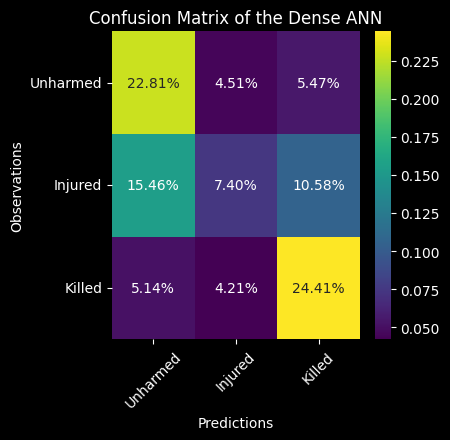

In [9]:
visualization.plot_confusion_matrix(
    y_true=y_test,
    y_pred=test_pred_class,
    model_name=models_df.loc[MODEL_ID, "model"].name.replace("_", " "),
)

## Ordinal Regression with Coral

In [10]:
MODEL_ID = "coral_ann"

NUM_CLASSES = 3
DROPOUT_RATE = 0.4

models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(128, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(32, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        coral.CoralOrdinal(num_classes=NUM_CLASSES),
    ],
    name="Coral_Ordinal_ANN",
)

models_df.loc[MODEL_ID, "model"].compile(
    loss=coral.OrdinalCrossEntropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

In [11]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 17:40 - loss: 1.2512 - accuracy: 0.4062 - mean_absolute_error_labels: 0.7188

 22/641 [>.............................] - ETA: 1s - loss: 1.4580 - accuracy: 0.3438 - mean_absolute_error_labels: 0.8082   

 42/641 [>.............................] - ETA: 1s - loss: 1.3423 - accuracy: 0.3371 - mean_absolute_error_labels: 0.7180

 62/641 [=>............................] - ETA: 1s - loss: 1.2877 - accuracy: 0.3397 - mean_absolute_error_labels: 0.6734

 83/641 [==>...........................] - ETA: 1s - loss: 1.2600 - accuracy: 0.3392 - mean_absolute_error_labels: 0.6547

105/641 [===>..........................] - ETA: 1s - loss: 1.2363 - accuracy: 0.3402 - mean_absolute_error_labels: 0.6423

127/641 [====>.........................] - ETA: 1s - loss: 1.2191 - accuracy: 0.3396 - mean_absolute_error_labels: 0.6371

148/641 [=====>........................] - ETA: 1s - loss: 1.2039 - accuracy: 0.3404 - mean_absolute_error_labels: 0.6299

170/641 [======>.......................] - ETA: 1s - loss: 1.1933 - accuracy: 0.3393 - mean_absolute_error_labels: 0.6252

192/641 [=======>......................] - ETA: 1s - loss: 1.1788 - accuracy: 0.3382 - mean_absolute_error_labels: 0.6160

213/641 [========>.....................] - ETA: 1s - loss: 1.1750 - accuracy: 0.3382 - mean_absolute_error_labels: 0.6136

235/641 [=========>....................] - ETA: 0s - loss: 1.1717 - accuracy: 0.3391 - mean_absolute_error_labels: 0.6126

257/641 [===========>..................] - ETA: 0s - loss: 1.1662 - accuracy: 0.3371 - mean_absolute_error_labels: 0.6109

278/641 [============>.................] - ETA: 0s - loss: 1.1643 - accuracy: 0.3379 - mean_absolute_error_labels: 0.6088

299/641 [============>.................] - ETA: 0s - loss: 1.1621 - accuracy: 0.3362 - mean_absolute_error_labels: 0.6072

321/641 [==============>...............] - ETA: 0s - loss: 1.1558 - accuracy: 0.3365 - mean_absolute_error_labels: 0.6040

342/641 [===============>..............] - ETA: 0s - loss: 1.1534 - accuracy: 0.3373 - mean_absolute_error_labels: 0.6017

364/641 [================>.............] - ETA: 0s - loss: 1.1507 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5998

384/641 [================>.............] - ETA: 0s - loss: 1.1494 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5994

405/641 [=================>............] - ETA: 0s - loss: 1.1455 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5970

427/641 [==================>...........] - ETA: 0s - loss: 1.1453 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5973

449/641 [====================>.........] - ETA: 0s - loss: 1.1453 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5970

471/641 [=====================>........] - ETA: 0s - loss: 1.1434 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5956

494/641 [======================>.......] - ETA: 0s - loss: 1.1398 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5927

518/641 [=======================>......] - ETA: 0s - loss: 1.1409 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5932

542/641 [========================>.....] - ETA: 0s - loss: 1.1383 - accuracy: 0.3308 - mean_absolute_error_labels: 0.5918

564/641 [=========================>....] - ETA: 0s - loss: 1.1373 - accuracy: 0.3304 - mean_absolute_error_labels: 0.5920

586/641 [==========================>...] - ETA: 0s - loss: 1.1371 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5927

608/641 [===========================>..] - ETA: 0s - loss: 1.1345 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5909

630/641 [============================>.] - ETA: 0s - loss: 1.1347 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5915

641/641 [==============================] - 4s 3ms/step - loss: 1.1341 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5916 - val_loss: 1.0567 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5530 - lr: 0.0100


Epoch 2/20


  1/641 [..............................] - ETA: 2s - loss: 1.1118 - accuracy: 0.2812 - mean_absolute_error_labels: 0.6562

 23/641 [>.............................] - ETA: 1s - loss: 1.0977 - accuracy: 0.3125 - mean_absolute_error_labels: 0.5639

 45/641 [=>............................] - ETA: 1s - loss: 1.1190 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5875

 67/641 [==>...........................] - ETA: 1s - loss: 1.1198 - accuracy: 0.3386 - mean_absolute_error_labels: 0.5933

 88/641 [===>..........................] - ETA: 1s - loss: 1.1065 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5859

110/641 [====>.........................] - ETA: 1s - loss: 1.1101 - accuracy: 0.3395 - mean_absolute_error_labels: 0.5858

132/641 [=====>........................] - ETA: 1s - loss: 1.1045 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5784

154/641 [======>.......................] - ETA: 1s - loss: 1.1069 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5820

176/641 [=======>......................] - ETA: 1s - loss: 1.1065 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5803

198/641 [========>.....................] - ETA: 1s - loss: 1.1021 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5772

220/641 [=========>....................] - ETA: 0s - loss: 1.1008 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5749

241/641 [==========>...................] - ETA: 0s - loss: 1.1025 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5752

262/641 [===========>..................] - ETA: 0s - loss: 1.1012 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5740

285/641 [============>.................] - ETA: 0s - loss: 1.1026 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5737

306/641 [=============>................] - ETA: 0s - loss: 1.1018 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5723

325/641 [==============>...............] - ETA: 0s - loss: 1.1002 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5723

348/641 [===============>..............] - ETA: 0s - loss: 1.0971 - accuracy: 0.3307 - mean_absolute_error_labels: 0.5709

370/641 [================>.............] - ETA: 0s - loss: 1.1006 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5728

391/641 [=================>............] - ETA: 0s - loss: 1.1010 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5742

410/641 [==================>...........] - ETA: 0s - loss: 1.1013 - accuracy: 0.3306 - mean_absolute_error_labels: 0.5744

431/641 [===================>..........] - ETA: 0s - loss: 1.1024 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5734

452/641 [====================>.........] - ETA: 0s - loss: 1.1040 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5745

473/641 [=====================>........] - ETA: 0s - loss: 1.1044 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5743

494/641 [======================>.......] - ETA: 0s - loss: 1.1038 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5733

514/641 [=======================>......] - ETA: 0s - loss: 1.1028 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5731

535/641 [========================>.....] - ETA: 0s - loss: 1.1015 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5720

556/641 [=========================>....] - ETA: 0s - loss: 1.1018 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5724

577/641 [==========================>...] - ETA: 0s - loss: 1.1012 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5722

598/641 [==========================>...] - ETA: 0s - loss: 1.1006 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5714

619/641 [===========================>..] - ETA: 0s - loss: 1.1012 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5719

640/641 [============================>.] - ETA: 0s - loss: 1.1015 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5720

641/641 [==============================] - 2s 3ms/step - loss: 1.1016 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5723 - val_loss: 1.0784 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5686 - lr: 0.0100


Epoch 3/20


  1/641 [..............................] - ETA: 1s - loss: 0.9877 - accuracy: 0.4062 - mean_absolute_error_labels: 0.5312

 23/641 [>.............................] - ETA: 1s - loss: 1.0888 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5625

 45/641 [=>............................] - ETA: 1s - loss: 1.0947 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5632

 66/641 [==>...........................] - ETA: 1s - loss: 1.0891 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5521

 88/641 [===>..........................] - ETA: 1s - loss: 1.0965 - accuracy: 0.3434 - mean_absolute_error_labels: 0.5600

109/641 [====>.........................] - ETA: 1s - loss: 1.0937 - accuracy: 0.3463 - mean_absolute_error_labels: 0.5619

132/641 [=====>........................] - ETA: 1s - loss: 1.1034 - accuracy: 0.3468 - mean_absolute_error_labels: 0.5689

153/641 [======>.......................] - ETA: 1s - loss: 1.1049 - accuracy: 0.3425 - mean_absolute_error_labels: 0.5723

174/641 [=======>......................] - ETA: 1s - loss: 1.1035 - accuracy: 0.3400 - mean_absolute_error_labels: 0.5700

196/641 [========>.....................] - ETA: 1s - loss: 1.1019 - accuracy: 0.3420 - mean_absolute_error_labels: 0.5674

218/641 [=========>....................] - ETA: 0s - loss: 1.1048 - accuracy: 0.3406 - mean_absolute_error_labels: 0.5698

242/641 [==========>...................] - ETA: 0s - loss: 1.0971 - accuracy: 0.3427 - mean_absolute_error_labels: 0.5657

262/641 [===========>..................] - ETA: 0s - loss: 1.0988 - accuracy: 0.3415 - mean_absolute_error_labels: 0.5676

282/641 [============>.................] - ETA: 0s - loss: 1.0981 - accuracy: 0.3436 - mean_absolute_error_labels: 0.5664

303/641 [=============>................] - ETA: 0s - loss: 1.0977 - accuracy: 0.3418 - mean_absolute_error_labels: 0.5664

323/641 [==============>...............] - ETA: 0s - loss: 1.1000 - accuracy: 0.3407 - mean_absolute_error_labels: 0.5674

343/641 [===============>..............] - ETA: 0s - loss: 1.1004 - accuracy: 0.3395 - mean_absolute_error_labels: 0.5675

363/641 [===============>..............] - ETA: 0s - loss: 1.1020 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5684

384/641 [================>.............] - ETA: 0s - loss: 1.1031 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5680

405/641 [=================>............] - ETA: 0s - loss: 1.1066 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5694

426/641 [==================>...........] - ETA: 0s - loss: 1.1074 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5699

446/641 [===================>..........] - ETA: 0s - loss: 1.1084 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5701

466/641 [====================>.........] - ETA: 0s - loss: 1.1097 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5707

486/641 [=====================>........] - ETA: 0s - loss: 1.1080 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5698

507/641 [======================>.......] - ETA: 0s - loss: 1.1063 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5685

527/641 [=======================>......] - ETA: 0s - loss: 1.1068 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5688

547/641 [========================>.....] - ETA: 0s - loss: 1.1074 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5698

567/641 [=========================>....] - ETA: 0s - loss: 1.1063 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5691

588/641 [==========================>...] - ETA: 0s - loss: 1.1054 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5686

608/641 [===========================>..] - ETA: 0s - loss: 1.1068 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5697

629/641 [============================>.] - ETA: 0s - loss: 1.1064 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5685

641/641 [==============================] - 2s 3ms/step - loss: 1.1071 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5691 - val_loss: 1.0683 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5625 - lr: 0.0100


Epoch 4/20


  1/641 [..............................] - ETA: 1s - loss: 0.9477 - accuracy: 0.2188 - mean_absolute_error_labels: 0.4688

 21/641 [..............................] - ETA: 1s - loss: 1.0387 - accuracy: 0.3780 - mean_absolute_error_labels: 0.5402

 40/641 [>.............................] - ETA: 1s - loss: 1.0606 - accuracy: 0.3562 - mean_absolute_error_labels: 0.5547

 59/641 [=>............................] - ETA: 1s - loss: 1.0733 - accuracy: 0.3480 - mean_absolute_error_labels: 0.5678

 79/641 [==>...........................] - ETA: 1s - loss: 1.0788 - accuracy: 0.3414 - mean_absolute_error_labels: 0.5704

100/641 [===>..........................] - ETA: 1s - loss: 1.0915 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5747

121/641 [====>.........................] - ETA: 1s - loss: 1.1021 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5808

141/641 [=====>........................] - ETA: 1s - loss: 1.1086 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5820

163/641 [======>.......................] - ETA: 1s - loss: 1.1072 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5780

185/641 [=======>......................] - ETA: 1s - loss: 1.1092 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5772

206/641 [========>.....................] - ETA: 1s - loss: 1.1069 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5755

223/641 [=========>....................] - ETA: 1s - loss: 1.1046 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5734

246/641 [==========>...................] - ETA: 1s - loss: 1.1039 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5746

267/641 [===========>..................] - ETA: 0s - loss: 1.1052 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5761

289/641 [============>.................] - ETA: 0s - loss: 1.1055 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5741

310/641 [=============>................] - ETA: 0s - loss: 1.1050 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5738

331/641 [==============>...............] - ETA: 0s - loss: 1.1077 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5736

352/641 [===============>..............] - ETA: 0s - loss: 1.1070 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5732

375/641 [================>.............] - ETA: 0s - loss: 1.1057 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5725

397/641 [=================>............] - ETA: 0s - loss: 1.1086 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5735

420/641 [==================>...........] - ETA: 0s - loss: 1.1079 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5734

442/641 [===================>..........] - ETA: 0s - loss: 1.1068 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5721

462/641 [====================>.........] - ETA: 0s - loss: 1.1053 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5709

482/641 [=====================>........] - ETA: 0s - loss: 1.1054 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5713

505/641 [======================>.......] - ETA: 0s - loss: 1.1045 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5703

527/641 [=======================>......] - ETA: 0s - loss: 1.1056 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5700

549/641 [========================>.....] - ETA: 0s - loss: 1.1040 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5688

570/641 [=========================>....] - ETA: 0s - loss: 1.1067 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5706

592/641 [==========================>...] - ETA: 0s - loss: 1.1071 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5705

615/641 [===========================>..] - ETA: 0s - loss: 1.1090 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5719

636/641 [============================>.] - ETA: 0s - loss: 1.1089 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5717

641/641 [==============================] - 2s 3ms/step - loss: 1.1089 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5717 - val_loss: 1.0809 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5820 - lr: 0.0100


Epoch 5/20


  1/641 [..............................] - ETA: 2s - loss: 0.9729 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5625

 23/641 [>.............................] - ETA: 1s - loss: 1.0719 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5557

 45/641 [=>............................] - ETA: 1s - loss: 1.0799 - accuracy: 0.3507 - mean_absolute_error_labels: 0.5521

 67/641 [==>...........................] - ETA: 1s - loss: 1.0786 - accuracy: 0.3451 - mean_absolute_error_labels: 0.5508

 88/641 [===>..........................] - ETA: 1s - loss: 1.0817 - accuracy: 0.3423 - mean_absolute_error_labels: 0.5533

110/641 [====>.........................] - ETA: 1s - loss: 1.0959 - accuracy: 0.3369 - mean_absolute_error_labels: 0.5582

133/641 [=====>........................] - ETA: 1s - loss: 1.0985 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5618

154/641 [======>.......................] - ETA: 1s - loss: 1.0998 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5678

177/641 [=======>......................] - ETA: 1s - loss: 1.1031 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5689

199/641 [========>.....................] - ETA: 1s - loss: 1.1097 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5715

221/641 [=========>....................] - ETA: 0s - loss: 1.1108 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5721

243/641 [==========>...................] - ETA: 0s - loss: 1.1115 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5723

267/641 [===========>..................] - ETA: 0s - loss: 1.1094 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5723

290/641 [============>.................] - ETA: 0s - loss: 1.1102 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5724

313/641 [=============>................] - ETA: 0s - loss: 1.1118 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5712

335/641 [==============>...............] - ETA: 0s - loss: 1.1077 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5674

357/641 [===============>..............] - ETA: 0s - loss: 1.1087 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5685

379/641 [================>.............] - ETA: 0s - loss: 1.1089 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5687

401/641 [=================>............] - ETA: 0s - loss: 1.1047 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5669

423/641 [==================>...........] - ETA: 0s - loss: 1.1064 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5698

445/641 [===================>..........] - ETA: 0s - loss: 1.1045 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5690

464/641 [====================>.........] - ETA: 0s - loss: 1.1057 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5696

484/641 [=====================>........] - ETA: 0s - loss: 1.1065 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5699

508/641 [======================>.......] - ETA: 0s - loss: 1.1065 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5702

531/641 [=======================>......] - ETA: 0s - loss: 1.1072 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5707

553/641 [========================>.....] - ETA: 0s - loss: 1.1066 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5700

575/641 [=========================>....] - ETA: 0s - loss: 1.1068 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5699

597/641 [==========================>...] - ETA: 0s - loss: 1.1064 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5683

620/641 [============================>.] - ETA: 0s - loss: 1.1047 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5672

641/641 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5689

641/641 [==============================] - 2s 3ms/step - loss: 1.1063 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5689 - val_loss: 1.0683 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5599 - lr: 0.0100


Epoch 6/20


  1/641 [..............................] - ETA: 2s - loss: 0.9675 - accuracy: 0.4062 - mean_absolute_error_labels: 0.5000

 23/641 [>.............................] - ETA: 1s - loss: 1.0959 - accuracy: 0.3383 - mean_absolute_error_labels: 0.5503

 44/641 [=>............................] - ETA: 1s - loss: 1.1036 - accuracy: 0.3310 - mean_absolute_error_labels: 0.5497

 67/641 [==>...........................] - ETA: 1s - loss: 1.0919 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5462

 89/641 [===>..........................] - ETA: 1s - loss: 1.0863 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5446

111/641 [====>.........................] - ETA: 1s - loss: 1.0800 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5436

133/641 [=====>........................] - ETA: 1s - loss: 1.0823 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5463

154/641 [======>.......................] - ETA: 1s - loss: 1.0852 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5481

177/641 [=======>......................] - ETA: 1s - loss: 1.0905 - accuracy: 0.3293 - mean_absolute_error_labels: 0.5521

199/641 [========>.....................] - ETA: 1s - loss: 1.0904 - accuracy: 0.3268 - mean_absolute_error_labels: 0.5520

220/641 [=========>....................] - ETA: 0s - loss: 1.0925 - accuracy: 0.3291 - mean_absolute_error_labels: 0.5520

242/641 [==========>...................] - ETA: 0s - loss: 1.0973 - accuracy: 0.3314 - mean_absolute_error_labels: 0.5581

265/641 [===========>..................] - ETA: 0s - loss: 1.0964 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5566

288/641 [============>.................] - ETA: 0s - loss: 1.0961 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5552

311/641 [=============>................] - ETA: 0s - loss: 1.0956 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5558

334/641 [==============>...............] - ETA: 0s - loss: 1.0960 - accuracy: 0.3370 - mean_absolute_error_labels: 0.5567

355/641 [===============>..............] - ETA: 0s - loss: 1.0966 - accuracy: 0.3387 - mean_absolute_error_labels: 0.5565

376/641 [================>.............] - ETA: 0s - loss: 1.0977 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5570

398/641 [=================>............] - ETA: 0s - loss: 1.0985 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5583

419/641 [==================>...........] - ETA: 0s - loss: 1.0985 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5576

442/641 [===================>..........] - ETA: 0s - loss: 1.0979 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5568

464/641 [====================>.........] - ETA: 0s - loss: 1.0983 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5561

486/641 [=====================>........] - ETA: 0s - loss: 1.0969 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5556

509/641 [======================>.......] - ETA: 0s - loss: 1.0984 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5569

530/641 [=======================>......] - ETA: 0s - loss: 1.0998 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5584

553/641 [========================>.....] - ETA: 0s - loss: 1.0986 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5573

575/641 [=========================>....] - ETA: 0s - loss: 1.0970 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5560

597/641 [==========================>...] - ETA: 0s - loss: 1.0958 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5542

619/641 [===========================>..] - ETA: 0s - loss: 1.0958 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5545

641/641 [==============================] - 2s 3ms/step - loss: 1.0971 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5558 - val_loss: 1.0918 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5894 - lr: 0.0100


Epoch 7/20


  1/641 [..............................] - ETA: 1s - loss: 1.0943 - accuracy: 0.3125 - mean_absolute_error_labels: 0.5625

 22/641 [>.............................] - ETA: 1s - loss: 1.0875 - accuracy: 0.3182 - mean_absolute_error_labels: 0.5568

 44/641 [=>............................] - ETA: 1s - loss: 1.1067 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5710

 66/641 [==>...........................] - ETA: 1s - loss: 1.1053 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5677

 89/641 [===>..........................] - ETA: 1s - loss: 1.0962 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5629

111/641 [====>.........................] - ETA: 1s - loss: 1.0997 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5648

134/641 [=====>........................] - ETA: 1s - loss: 1.0968 - accuracy: 0.3465 - mean_absolute_error_labels: 0.5630

156/641 [======>.......................] - ETA: 1s - loss: 1.0997 - accuracy: 0.3407 - mean_absolute_error_labels: 0.5657

179/641 [=======>......................] - ETA: 1s - loss: 1.1103 - accuracy: 0.3425 - mean_absolute_error_labels: 0.5714

202/641 [========>.....................] - ETA: 1s - loss: 1.1107 - accuracy: 0.3442 - mean_absolute_error_labels: 0.5707

225/641 [=========>....................] - ETA: 0s - loss: 1.1115 - accuracy: 0.3424 - mean_absolute_error_labels: 0.5703

246/641 [==========>...................] - ETA: 0s - loss: 1.1080 - accuracy: 0.3420 - mean_absolute_error_labels: 0.5675

268/641 [===========>..................] - ETA: 0s - loss: 1.1062 - accuracy: 0.3403 - mean_absolute_error_labels: 0.5668

290/641 [============>.................] - ETA: 0s - loss: 1.1087 - accuracy: 0.3389 - mean_absolute_error_labels: 0.5666

312/641 [=============>................] - ETA: 0s - loss: 1.1116 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5674

334/641 [==============>...............] - ETA: 0s - loss: 1.1114 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5667

356/641 [===============>..............] - ETA: 0s - loss: 1.1107 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5672

378/641 [================>.............] - ETA: 0s - loss: 1.1113 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5670

401/641 [=================>............] - ETA: 0s - loss: 1.1107 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5673

423/641 [==================>...........] - ETA: 0s - loss: 1.1097 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5660

446/641 [===================>..........] - ETA: 0s - loss: 1.1108 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5669

468/641 [====================>.........] - ETA: 0s - loss: 1.1086 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5662

490/641 [=====================>........] - ETA: 0s - loss: 1.1078 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5663

512/641 [======================>.......] - ETA: 0s - loss: 1.1083 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5656

535/641 [========================>.....] - ETA: 0s - loss: 1.1080 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5661

557/641 [=========================>....] - ETA: 0s - loss: 1.1075 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5659

579/641 [==========================>...] - ETA: 0s - loss: 1.1069 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5653

601/641 [===========================>..] - ETA: 0s - loss: 1.1076 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5661

622/641 [============================>.] - ETA: 0s - loss: 1.1075 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5653

641/641 [==============================] - 2s 3ms/step - loss: 1.1069 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5653 - val_loss: 1.0647 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5812 - lr: 0.0100


Epoch 8/20


  1/641 [..............................] - ETA: 2s - loss: 1.2943 - accuracy: 0.2500 - mean_absolute_error_labels: 0.6250

 23/641 [>.............................] - ETA: 1s - loss: 1.0509 - accuracy: 0.3424 - mean_absolute_error_labels: 0.5245

 44/641 [=>............................] - ETA: 1s - loss: 1.0659 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5341

 66/641 [==>...........................] - ETA: 1s - loss: 1.0793 - accuracy: 0.3258 - mean_absolute_error_labels: 0.5445

 89/641 [===>..........................] - ETA: 1s - loss: 1.0919 - accuracy: 0.3276 - mean_absolute_error_labels: 0.5576

109/641 [====>.........................] - ETA: 1s - loss: 1.0877 - accuracy: 0.3263 - mean_absolute_error_labels: 0.5568

132/641 [=====>........................] - ETA: 1s - loss: 1.0808 - accuracy: 0.3272 - mean_absolute_error_labels: 0.5518

156/641 [======>.......................] - ETA: 1s - loss: 1.0817 - accuracy: 0.3261 - mean_absolute_error_labels: 0.5491

176/641 [=======>......................] - ETA: 1s - loss: 1.0847 - accuracy: 0.3283 - mean_absolute_error_labels: 0.5549

198/641 [========>.....................] - ETA: 1s - loss: 1.0789 - accuracy: 0.3269 - mean_absolute_error_labels: 0.5496

219/641 [=========>....................] - ETA: 0s - loss: 1.0818 - accuracy: 0.3271 - mean_absolute_error_labels: 0.5507

241/641 [==========>...................] - ETA: 0s - loss: 1.0827 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5512

264/641 [===========>..................] - ETA: 0s - loss: 1.0812 - accuracy: 0.3297 - mean_absolute_error_labels: 0.5507

286/641 [============>.................] - ETA: 0s - loss: 1.0789 - accuracy: 0.3292 - mean_absolute_error_labels: 0.5494

308/641 [=============>................] - ETA: 0s - loss: 1.0821 - accuracy: 0.3315 - mean_absolute_error_labels: 0.5515

330/641 [==============>...............] - ETA: 0s - loss: 1.0818 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5496

351/641 [===============>..............] - ETA: 0s - loss: 1.0797 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5487

373/641 [================>.............] - ETA: 0s - loss: 1.0797 - accuracy: 0.3311 - mean_absolute_error_labels: 0.5484

395/641 [=================>............] - ETA: 0s - loss: 1.0789 - accuracy: 0.3306 - mean_absolute_error_labels: 0.5469

416/641 [==================>...........] - ETA: 0s - loss: 1.0761 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5446

439/641 [===================>..........] - ETA: 0s - loss: 1.0771 - accuracy: 0.3323 - mean_absolute_error_labels: 0.5462

462/641 [====================>.........] - ETA: 0s - loss: 1.0766 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5453

485/641 [=====================>........] - ETA: 0s - loss: 1.0785 - accuracy: 0.3316 - mean_absolute_error_labels: 0.5464

507/641 [======================>.......] - ETA: 0s - loss: 1.0786 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5465

530/641 [=======================>......] - ETA: 0s - loss: 1.0785 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5459

552/641 [========================>.....] - ETA: 0s - loss: 1.0781 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5460

575/641 [=========================>....] - ETA: 0s - loss: 1.0794 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5472

597/641 [==========================>...] - ETA: 0s - loss: 1.0796 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5479

619/641 [===========================>..] - ETA: 0s - loss: 1.0792 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5479

639/641 [============================>.] - ETA: 0s - loss: 1.0779 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5466

641/641 [==============================] - 2s 3ms/step - loss: 1.0782 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5467 - val_loss: 1.0542 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5664 - lr: 0.0075


Epoch 9/20


  1/641 [..............................] - ETA: 2s - loss: 1.1391 - accuracy: 0.2812 - mean_absolute_error_labels: 0.6875

 24/641 [>.............................] - ETA: 1s - loss: 1.0802 - accuracy: 0.3529 - mean_absolute_error_labels: 0.5768

 44/641 [=>............................] - ETA: 1s - loss: 1.0780 - accuracy: 0.3416 - mean_absolute_error_labels: 0.5589

 67/641 [==>...........................] - ETA: 1s - loss: 1.0948 - accuracy: 0.3470 - mean_absolute_error_labels: 0.5592

 89/641 [===>..........................] - ETA: 1s - loss: 1.0916 - accuracy: 0.3469 - mean_absolute_error_labels: 0.5569

111/641 [====>.........................] - ETA: 1s - loss: 1.0891 - accuracy: 0.3423 - mean_absolute_error_labels: 0.5518

130/641 [=====>........................] - ETA: 1s - loss: 1.0872 - accuracy: 0.3447 - mean_absolute_error_labels: 0.5507

148/641 [=====>........................] - ETA: 1s - loss: 1.0860 - accuracy: 0.3478 - mean_absolute_error_labels: 0.5507

167/641 [======>.......................] - ETA: 1s - loss: 1.0848 - accuracy: 0.3520 - mean_absolute_error_labels: 0.5522

185/641 [=======>......................] - ETA: 1s - loss: 1.0855 - accuracy: 0.3476 - mean_absolute_error_labels: 0.5493

205/641 [========>.....................] - ETA: 1s - loss: 1.0880 - accuracy: 0.3460 - mean_absolute_error_labels: 0.5532

224/641 [=========>....................] - ETA: 1s - loss: 1.0883 - accuracy: 0.3453 - mean_absolute_error_labels: 0.5557

244/641 [==========>...................] - ETA: 1s - loss: 1.0859 - accuracy: 0.3402 - mean_absolute_error_labels: 0.5538

264/641 [===========>..................] - ETA: 0s - loss: 1.0871 - accuracy: 0.3406 - mean_absolute_error_labels: 0.5535

284/641 [============>.................] - ETA: 0s - loss: 1.0856 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5507

303/641 [=============>................] - ETA: 0s - loss: 1.0895 - accuracy: 0.3409 - mean_absolute_error_labels: 0.5547

322/641 [==============>...............] - ETA: 0s - loss: 1.0874 - accuracy: 0.3407 - mean_absolute_error_labels: 0.5539

343/641 [===============>..............] - ETA: 0s - loss: 1.0847 - accuracy: 0.3414 - mean_absolute_error_labels: 0.5523

364/641 [================>.............] - ETA: 0s - loss: 1.0816 - accuracy: 0.3419 - mean_absolute_error_labels: 0.5504

385/641 [=================>............] - ETA: 0s - loss: 1.0798 - accuracy: 0.3422 - mean_absolute_error_labels: 0.5485

405/641 [=================>............] - ETA: 0s - loss: 1.0778 - accuracy: 0.3414 - mean_absolute_error_labels: 0.5492

426/641 [==================>...........] - ETA: 0s - loss: 1.0784 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5500

447/641 [===================>..........] - ETA: 0s - loss: 1.0779 - accuracy: 0.3400 - mean_absolute_error_labels: 0.5503

469/641 [====================>.........] - ETA: 0s - loss: 1.0776 - accuracy: 0.3391 - mean_absolute_error_labels: 0.5496

489/641 [=====================>........] - ETA: 0s - loss: 1.0771 - accuracy: 0.3383 - mean_absolute_error_labels: 0.5489

510/641 [======================>.......] - ETA: 0s - loss: 1.0759 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5485

531/641 [=======================>......] - ETA: 0s - loss: 1.0746 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5490

552/641 [========================>.....] - ETA: 0s - loss: 1.0742 - accuracy: 0.3360 - mean_absolute_error_labels: 0.5489

573/641 [=========================>....] - ETA: 0s - loss: 1.0739 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5480

593/641 [==========================>...] - ETA: 0s - loss: 1.0735 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5476

613/641 [===========================>..] - ETA: 0s - loss: 1.0739 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5479

634/641 [============================>.] - ETA: 0s - loss: 1.0742 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5479

641/641 [==============================] - 2s 3ms/step - loss: 1.0744 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5483 - val_loss: 1.0699 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5703 - lr: 0.0075


Epoch 10/20


  1/641 [..............................] - ETA: 3s - loss: 0.9284 - accuracy: 0.5312 - mean_absolute_error_labels: 0.5625

 21/641 [..............................] - ETA: 1s - loss: 1.1424 - accuracy: 0.3616 - mean_absolute_error_labels: 0.6042

 41/641 [>.............................] - ETA: 1s - loss: 1.1216 - accuracy: 0.3430 - mean_absolute_error_labels: 0.5808

 62/641 [=>............................] - ETA: 1s - loss: 1.0974 - accuracy: 0.3392 - mean_absolute_error_labels: 0.5595

 81/641 [==>...........................] - ETA: 1s - loss: 1.0890 - accuracy: 0.3395 - mean_absolute_error_labels: 0.5513

101/641 [===>..........................] - ETA: 1s - loss: 1.0845 - accuracy: 0.3416 - mean_absolute_error_labels: 0.5489

120/641 [====>.........................] - ETA: 1s - loss: 1.0805 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5477

141/641 [=====>........................] - ETA: 1s - loss: 1.0811 - accuracy: 0.3380 - mean_absolute_error_labels: 0.5437

162/641 [======>.......................] - ETA: 1s - loss: 1.0747 - accuracy: 0.3405 - mean_absolute_error_labels: 0.5436

183/641 [=======>......................] - ETA: 1s - loss: 1.0681 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5415

203/641 [========>.....................] - ETA: 1s - loss: 1.0643 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5385

222/641 [=========>....................] - ETA: 1s - loss: 1.0652 - accuracy: 0.3394 - mean_absolute_error_labels: 0.5394

242/641 [==========>...................] - ETA: 1s - loss: 1.0638 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5369

262/641 [===========>..................] - ETA: 0s - loss: 1.0629 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5360

283/641 [============>.................] - ETA: 0s - loss: 1.0645 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5366

304/641 [=============>................] - ETA: 0s - loss: 1.0657 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5369

325/641 [==============>...............] - ETA: 0s - loss: 1.0644 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5344

348/641 [===============>..............] - ETA: 0s - loss: 1.0670 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5356

370/641 [================>.............] - ETA: 0s - loss: 1.0667 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5374

392/641 [=================>............] - ETA: 0s - loss: 1.0676 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5371

412/641 [==================>...........] - ETA: 0s - loss: 1.0678 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5366

432/641 [===================>..........] - ETA: 0s - loss: 1.0682 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5380

455/641 [====================>.........] - ETA: 0s - loss: 1.0703 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5405

478/641 [=====================>........] - ETA: 0s - loss: 1.0683 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5383

499/641 [======================>.......] - ETA: 0s - loss: 1.0683 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5384

520/641 [=======================>......] - ETA: 0s - loss: 1.0687 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5398

541/641 [========================>.....] - ETA: 0s - loss: 1.0692 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5407

563/641 [=========================>....] - ETA: 0s - loss: 1.0701 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5413

586/641 [==========================>...] - ETA: 0s - loss: 1.0698 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5413

609/641 [===========================>..] - ETA: 0s - loss: 1.0702 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5415

631/641 [============================>.] - ETA: 0s - loss: 1.0702 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5415

641/641 [==============================] - 2s 3ms/step - loss: 1.0701 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5414 - val_loss: 1.0606 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5590 - lr: 0.0075


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 1.0560 - accuracy: 0.2188 - mean_absolute_error_labels: 0.5625

 23/641 [>.............................] - ETA: 1s - loss: 1.0200 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5122

 45/641 [=>............................] - ETA: 1s - loss: 1.0392 - accuracy: 0.3472 - mean_absolute_error_labels: 0.5257

 68/641 [==>...........................] - ETA: 1s - loss: 1.0553 - accuracy: 0.3520 - mean_absolute_error_labels: 0.5308

 92/641 [===>..........................] - ETA: 1s - loss: 1.0602 - accuracy: 0.3471 - mean_absolute_error_labels: 0.5336

113/641 [====>.........................] - ETA: 1s - loss: 1.0538 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5279

135/641 [=====>........................] - ETA: 1s - loss: 1.0711 - accuracy: 0.3428 - mean_absolute_error_labels: 0.5419

157/641 [======>.......................] - ETA: 1s - loss: 1.0740 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5414

177/641 [=======>......................] - ETA: 1s - loss: 1.0761 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5434

200/641 [========>.....................] - ETA: 1s - loss: 1.0800 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5458

222/641 [=========>....................] - ETA: 0s - loss: 1.0803 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5483

246/641 [==========>...................] - ETA: 0s - loss: 1.0791 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5476

269/641 [===========>..................] - ETA: 0s - loss: 1.0765 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5448

290/641 [============>.................] - ETA: 0s - loss: 1.0733 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5445

312/641 [=============>................] - ETA: 0s - loss: 1.0743 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5458

334/641 [==============>...............] - ETA: 0s - loss: 1.0738 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5444

356/641 [===============>..............] - ETA: 0s - loss: 1.0747 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5449

376/641 [================>.............] - ETA: 0s - loss: 1.0732 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5431

399/641 [=================>............] - ETA: 0s - loss: 1.0710 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5424

421/641 [==================>...........] - ETA: 0s - loss: 1.0718 - accuracy: 0.3325 - mean_absolute_error_labels: 0.5427

443/641 [===================>..........] - ETA: 0s - loss: 1.0725 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5444

465/641 [====================>.........] - ETA: 0s - loss: 1.0716 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5454

487/641 [=====================>........] - ETA: 0s - loss: 1.0736 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5461

509/641 [======================>.......] - ETA: 0s - loss: 1.0725 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5453

532/641 [=======================>......] - ETA: 0s - loss: 1.0720 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5448

554/641 [========================>.....] - ETA: 0s - loss: 1.0734 - accuracy: 0.3317 - mean_absolute_error_labels: 0.5459

578/641 [==========================>...] - ETA: 0s - loss: 1.0758 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5466

601/641 [===========================>..] - ETA: 0s - loss: 1.0771 - accuracy: 0.3330 - mean_absolute_error_labels: 0.5466

623/641 [============================>.] - ETA: 0s - loss: 1.0759 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5459

641/641 [==============================] - 2s 3ms/step - loss: 1.0762 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5458 - val_loss: 1.0626 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5551 - lr: 0.0075


Epoch 12/20


  1/641 [..............................] - ETA: 1s - loss: 0.9867 - accuracy: 0.4062 - mean_absolute_error_labels: 0.5312

 23/641 [>.............................] - ETA: 1s - loss: 1.0458 - accuracy: 0.3302 - mean_absolute_error_labels: 0.5272

 45/641 [=>............................] - ETA: 1s - loss: 1.0608 - accuracy: 0.3243 - mean_absolute_error_labels: 0.5340

 67/641 [==>...........................] - ETA: 1s - loss: 1.0824 - accuracy: 0.3288 - mean_absolute_error_labels: 0.5518

 90/641 [===>..........................] - ETA: 1s - loss: 1.0735 - accuracy: 0.3187 - mean_absolute_error_labels: 0.5483

113/641 [====>.........................] - ETA: 1s - loss: 1.0739 - accuracy: 0.3202 - mean_absolute_error_labels: 0.5448

135/641 [=====>........................] - ETA: 1s - loss: 1.0687 - accuracy: 0.3201 - mean_absolute_error_labels: 0.5394

157/641 [======>.......................] - ETA: 1s - loss: 1.0603 - accuracy: 0.3240 - mean_absolute_error_labels: 0.5366

180/641 [=======>......................] - ETA: 1s - loss: 1.0621 - accuracy: 0.3273 - mean_absolute_error_labels: 0.5394

201/641 [========>.....................] - ETA: 1s - loss: 1.0605 - accuracy: 0.3299 - mean_absolute_error_labels: 0.5393

224/641 [=========>....................] - ETA: 0s - loss: 1.0590 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5368

246/641 [==========>...................] - ETA: 0s - loss: 1.0573 - accuracy: 0.3296 - mean_absolute_error_labels: 0.5356

267/641 [===========>..................] - ETA: 0s - loss: 1.0619 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5385

290/641 [============>.................] - ETA: 0s - loss: 1.0638 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5380

312/641 [=============>................] - ETA: 0s - loss: 1.0635 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5385

335/641 [==============>...............] - ETA: 0s - loss: 1.0634 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5380

359/641 [===============>..............] - ETA: 0s - loss: 1.0655 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5396

381/641 [================>.............] - ETA: 0s - loss: 1.0677 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5407

405/641 [=================>............] - ETA: 0s - loss: 1.0696 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5427

427/641 [==================>...........] - ETA: 0s - loss: 1.0706 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5437

450/641 [====================>.........] - ETA: 0s - loss: 1.0714 - accuracy: 0.3335 - mean_absolute_error_labels: 0.5448

472/641 [=====================>........] - ETA: 0s - loss: 1.0707 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5443

494/641 [======================>.......] - ETA: 0s - loss: 1.0692 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5427

516/641 [=======================>......] - ETA: 0s - loss: 1.0683 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5422

538/641 [========================>.....] - ETA: 0s - loss: 1.0682 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5423

561/641 [=========================>....] - ETA: 0s - loss: 1.0706 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5434

583/641 [==========================>...] - ETA: 0s - loss: 1.0702 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5432

603/641 [===========================>..] - ETA: 0s - loss: 1.0699 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5433

625/641 [============================>.] - ETA: 0s - loss: 1.0697 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5436

641/641 [==============================] - 2s 3ms/step - loss: 1.0710 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5445 - val_loss: 1.0946 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5872 - lr: 0.0075


Epoch 13/20


  1/641 [..............................] - ETA: 1s - loss: 1.4499 - accuracy: 0.4688 - mean_absolute_error_labels: 0.6875

 23/641 [>.............................] - ETA: 1s - loss: 1.0832 - accuracy: 0.3424 - mean_absolute_error_labels: 0.5707

 45/641 [=>............................] - ETA: 1s - loss: 1.0720 - accuracy: 0.3306 - mean_absolute_error_labels: 0.5542

 68/641 [==>...........................] - ETA: 1s - loss: 1.0735 - accuracy: 0.3309 - mean_absolute_error_labels: 0.5561

 90/641 [===>..........................] - ETA: 1s - loss: 1.0700 - accuracy: 0.3385 - mean_absolute_error_labels: 0.5545

113/641 [====>.........................] - ETA: 1s - loss: 1.0616 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5454

135/641 [=====>........................] - ETA: 1s - loss: 1.0646 - accuracy: 0.3405 - mean_absolute_error_labels: 0.5428

158/641 [======>.......................] - ETA: 1s - loss: 1.0633 - accuracy: 0.3412 - mean_absolute_error_labels: 0.5394

179/641 [=======>......................] - ETA: 1s - loss: 1.0664 - accuracy: 0.3396 - mean_absolute_error_labels: 0.5393

201/641 [========>.....................] - ETA: 1s - loss: 1.0693 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5415

224/641 [=========>....................] - ETA: 0s - loss: 1.0734 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5417

246/641 [==========>...................] - ETA: 0s - loss: 1.0736 - accuracy: 0.3369 - mean_absolute_error_labels: 0.5413

268/641 [===========>..................] - ETA: 0s - loss: 1.0721 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5426

290/641 [============>.................] - ETA: 0s - loss: 1.0742 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5446

314/641 [=============>................] - ETA: 0s - loss: 1.0750 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5454

336/641 [==============>...............] - ETA: 0s - loss: 1.0742 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5460

360/641 [===============>..............] - ETA: 0s - loss: 1.0711 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5432

384/641 [================>.............] - ETA: 0s - loss: 1.0706 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5428

407/641 [==================>...........] - ETA: 0s - loss: 1.0700 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5422

430/641 [===================>..........] - ETA: 0s - loss: 1.0692 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5421

453/641 [====================>.........] - ETA: 0s - loss: 1.0676 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5408

475/641 [=====================>........] - ETA: 0s - loss: 1.0689 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5418

497/641 [======================>.......] - ETA: 0s - loss: 1.0676 - accuracy: 0.3333 - mean_absolute_error_labels: 0.5412

520/641 [=======================>......] - ETA: 0s - loss: 1.0669 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5409

544/641 [========================>.....] - ETA: 0s - loss: 1.0665 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5399

566/641 [=========================>....] - ETA: 0s - loss: 1.0686 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5421

587/641 [==========================>...] - ETA: 0s - loss: 1.0681 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5418

610/641 [===========================>..] - ETA: 0s - loss: 1.0705 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5425

633/641 [============================>.] - ETA: 0s - loss: 1.0703 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5419

641/641 [==============================] - 2s 3ms/step - loss: 1.0696 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5412 - val_loss: 1.0529 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5525 - lr: 0.0075


Epoch 14/20


  1/641 [..............................] - ETA: 2s - loss: 0.9410 - accuracy: 0.4688 - mean_absolute_error_labels: 0.4375

 22/641 [>.............................] - ETA: 1s - loss: 1.0641 - accuracy: 0.3196 - mean_absolute_error_labels: 0.5511

 44/641 [=>............................] - ETA: 1s - loss: 1.0639 - accuracy: 0.3224 - mean_absolute_error_labels: 0.5462

 67/641 [==>...........................] - ETA: 1s - loss: 1.0671 - accuracy: 0.3284 - mean_absolute_error_labels: 0.5424

 89/641 [===>..........................] - ETA: 1s - loss: 1.0605 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5411

111/641 [====>.........................] - ETA: 1s - loss: 1.0625 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5450

133/641 [=====>........................] - ETA: 1s - loss: 1.0667 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5484

156/641 [======>.......................] - ETA: 1s - loss: 1.0676 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5489

178/641 [=======>......................] - ETA: 1s - loss: 1.0716 - accuracy: 0.3406 - mean_absolute_error_labels: 0.5495

202/641 [========>.....................] - ETA: 1s - loss: 1.0736 - accuracy: 0.3414 - mean_absolute_error_labels: 0.5498

224/641 [=========>....................] - ETA: 0s - loss: 1.0785 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5526

246/641 [==========>...................] - ETA: 0s - loss: 1.0772 - accuracy: 0.3411 - mean_absolute_error_labels: 0.5502

268/641 [===========>..................] - ETA: 0s - loss: 1.0770 - accuracy: 0.3432 - mean_absolute_error_labels: 0.5504

290/641 [============>.................] - ETA: 0s - loss: 1.0756 - accuracy: 0.3422 - mean_absolute_error_labels: 0.5499

313/641 [=============>................] - ETA: 0s - loss: 1.0735 - accuracy: 0.3421 - mean_absolute_error_labels: 0.5477

333/641 [==============>...............] - ETA: 0s - loss: 1.0715 - accuracy: 0.3412 - mean_absolute_error_labels: 0.5464

354/641 [===============>..............] - ETA: 0s - loss: 1.0722 - accuracy: 0.3415 - mean_absolute_error_labels: 0.5468

376/641 [================>.............] - ETA: 0s - loss: 1.0697 - accuracy: 0.3390 - mean_absolute_error_labels: 0.5451

398/641 [=================>............] - ETA: 0s - loss: 1.0697 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5451

418/641 [==================>...........] - ETA: 0s - loss: 1.0698 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5450

438/641 [===================>..........] - ETA: 0s - loss: 1.0695 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5446

458/641 [====================>.........] - ETA: 0s - loss: 1.0695 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5444

478/641 [=====================>........] - ETA: 0s - loss: 1.0720 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5477

499/641 [======================>.......] - ETA: 0s - loss: 1.0722 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5487

520/641 [=======================>......] - ETA: 0s - loss: 1.0735 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5494

541/641 [========================>.....] - ETA: 0s - loss: 1.0743 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5498

563/641 [=========================>....] - ETA: 0s - loss: 1.0743 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5500

585/641 [==========================>...] - ETA: 0s - loss: 1.0742 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5503

603/641 [===========================>..] - ETA: 0s - loss: 1.0734 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5496

624/641 [============================>.] - ETA: 0s - loss: 1.0725 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5484

641/641 [==============================] - 2s 3ms/step - loss: 1.0728 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5489 - val_loss: 1.0652 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5720 - lr: 0.0075


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.9706 - accuracy: 0.3125 - mean_absolute_error_labels: 0.4688

 22/641 [>.............................] - ETA: 1s - loss: 1.0579 - accuracy: 0.3210 - mean_absolute_error_labels: 0.5540

 43/641 [=>............................] - ETA: 1s - loss: 1.0828 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5712

 65/641 [==>...........................] - ETA: 1s - loss: 1.0688 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5514

 88/641 [===>..........................] - ETA: 1s - loss: 1.0625 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5455

108/641 [====>.........................] - ETA: 1s - loss: 1.0628 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5425

127/641 [====>.........................] - ETA: 1s - loss: 1.0652 - accuracy: 0.3386 - mean_absolute_error_labels: 0.5468

148/641 [=====>........................] - ETA: 1s - loss: 1.0620 - accuracy: 0.3380 - mean_absolute_error_labels: 0.5420

169/641 [======>.......................] - ETA: 1s - loss: 1.0613 - accuracy: 0.3378 - mean_absolute_error_labels: 0.5396

193/641 [========>.....................] - ETA: 1s - loss: 1.0580 - accuracy: 0.3405 - mean_absolute_error_labels: 0.5366

215/641 [=========>....................] - ETA: 1s - loss: 1.0627 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5416

239/641 [==========>...................] - ETA: 0s - loss: 1.0629 - accuracy: 0.3423 - mean_absolute_error_labels: 0.5421

261/641 [===========>..................] - ETA: 0s - loss: 1.0662 - accuracy: 0.3404 - mean_absolute_error_labels: 0.5448

283/641 [============>.................] - ETA: 0s - loss: 1.0659 - accuracy: 0.3381 - mean_absolute_error_labels: 0.5443

306/641 [=============>................] - ETA: 0s - loss: 1.0643 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5426

325/641 [==============>...............] - ETA: 0s - loss: 1.0658 - accuracy: 0.3376 - mean_absolute_error_labels: 0.5439

346/641 [===============>..............] - ETA: 0s - loss: 1.0677 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5462

367/641 [================>.............] - ETA: 0s - loss: 1.0657 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5439

388/641 [=================>............] - ETA: 0s - loss: 1.0663 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5450

409/641 [==================>...........] - ETA: 0s - loss: 1.0650 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5451

430/641 [===================>..........] - ETA: 0s - loss: 1.0636 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5440

450/641 [====================>.........] - ETA: 0s - loss: 1.0621 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5432

471/641 [=====================>........] - ETA: 0s - loss: 1.0612 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5427

492/641 [======================>.......] - ETA: 0s - loss: 1.0614 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5429

513/641 [=======================>......] - ETA: 0s - loss: 1.0626 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5437

534/641 [=======================>......] - ETA: 0s - loss: 1.0612 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5424

553/641 [========================>.....] - ETA: 0s - loss: 1.0609 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5417

574/641 [=========================>....] - ETA: 0s - loss: 1.0618 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5417

595/641 [==========================>...] - ETA: 0s - loss: 1.0614 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5412

616/641 [===========================>..] - ETA: 0s - loss: 1.0613 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5413

637/641 [============================>.] - ETA: 0s - loss: 1.0622 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5416

641/641 [==============================] - 2s 3ms/step - loss: 1.0622 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5414 - val_loss: 1.0824 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5703 - lr: 0.0075


Epoch 16/20


  1/641 [..............................] - ETA: 3s - loss: 1.1452 - accuracy: 0.4688 - mean_absolute_error_labels: 0.6875

 22/641 [>.............................] - ETA: 1s - loss: 1.0897 - accuracy: 0.3509 - mean_absolute_error_labels: 0.5653

 42/641 [>.............................] - ETA: 1s - loss: 1.0919 - accuracy: 0.3423 - mean_absolute_error_labels: 0.5595

 63/641 [=>............................] - ETA: 1s - loss: 1.0753 - accuracy: 0.3398 - mean_absolute_error_labels: 0.5521

 83/641 [==>...........................] - ETA: 1s - loss: 1.0828 - accuracy: 0.3392 - mean_absolute_error_labels: 0.5610

105/641 [===>..........................] - ETA: 1s - loss: 1.0786 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5539

126/641 [====>.........................] - ETA: 1s - loss: 1.0698 - accuracy: 0.3400 - mean_absolute_error_labels: 0.5459

147/641 [=====>........................] - ETA: 1s - loss: 1.0634 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5395

167/641 [======>.......................] - ETA: 1s - loss: 1.0588 - accuracy: 0.3372 - mean_absolute_error_labels: 0.5389

186/641 [=======>......................] - ETA: 1s - loss: 1.0556 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5391

207/641 [========>.....................] - ETA: 1s - loss: 1.0534 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5367

226/641 [=========>....................] - ETA: 1s - loss: 1.0543 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5393

246/641 [==========>...................] - ETA: 0s - loss: 1.0535 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5399

267/641 [===========>..................] - ETA: 0s - loss: 1.0549 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5407

288/641 [============>.................] - ETA: 0s - loss: 1.0539 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5412

309/641 [=============>................] - ETA: 0s - loss: 1.0543 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5399

332/641 [==============>...............] - ETA: 0s - loss: 1.0552 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5409

355/641 [===============>..............] - ETA: 0s - loss: 1.0540 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5398

378/641 [================>.............] - ETA: 0s - loss: 1.0535 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5390

401/641 [=================>............] - ETA: 0s - loss: 1.0545 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5394

423/641 [==================>...........] - ETA: 0s - loss: 1.0528 - accuracy: 0.3316 - mean_absolute_error_labels: 0.5378

445/641 [===================>..........] - ETA: 0s - loss: 1.0521 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5380

467/641 [====================>.........] - ETA: 0s - loss: 1.0569 - accuracy: 0.3324 - mean_absolute_error_labels: 0.5408

488/641 [=====================>........] - ETA: 0s - loss: 1.0555 - accuracy: 0.3320 - mean_absolute_error_labels: 0.5399

508/641 [======================>.......] - ETA: 0s - loss: 1.0562 - accuracy: 0.3319 - mean_absolute_error_labels: 0.5396

530/641 [=======================>......] - ETA: 0s - loss: 1.0576 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5410

551/641 [========================>.....] - ETA: 0s - loss: 1.0591 - accuracy: 0.3326 - mean_absolute_error_labels: 0.5412

574/641 [=========================>....] - ETA: 0s - loss: 1.0589 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5407

597/641 [==========================>...] - ETA: 0s - loss: 1.0585 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5403

620/641 [============================>.] - ETA: 0s - loss: 1.0575 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5402

641/641 [==============================] - 2s 3ms/step - loss: 1.0578 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5399 - val_loss: 1.0705 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5664 - lr: 0.0075


Epoch 17/20


  1/641 [..............................] - ETA: 2s - loss: 1.0204 - accuracy: 0.2500 - mean_absolute_error_labels: 0.4375

 22/641 [>.............................] - ETA: 1s - loss: 1.0311 - accuracy: 0.3509 - mean_absolute_error_labels: 0.5227

 45/641 [=>............................] - ETA: 1s - loss: 1.0403 - accuracy: 0.3444 - mean_absolute_error_labels: 0.5333

 68/641 [==>...........................] - ETA: 1s - loss: 1.0493 - accuracy: 0.3465 - mean_absolute_error_labels: 0.5340

 91/641 [===>..........................] - ETA: 1s - loss: 1.0500 - accuracy: 0.3506 - mean_absolute_error_labels: 0.5357

114/641 [====>.........................] - ETA: 1s - loss: 1.0554 - accuracy: 0.3509 - mean_absolute_error_labels: 0.5381

137/641 [=====>........................] - ETA: 1s - loss: 1.0554 - accuracy: 0.3458 - mean_absolute_error_labels: 0.5354

158/641 [======>.......................] - ETA: 1s - loss: 1.0535 - accuracy: 0.3453 - mean_absolute_error_labels: 0.5346

181/641 [=======>......................] - ETA: 1s - loss: 1.0591 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5364

204/641 [========>.....................] - ETA: 1s - loss: 1.0590 - accuracy: 0.3395 - mean_absolute_error_labels: 0.5360

225/641 [=========>....................] - ETA: 0s - loss: 1.0627 - accuracy: 0.3399 - mean_absolute_error_labels: 0.5396

247/641 [==========>...................] - ETA: 0s - loss: 1.0595 - accuracy: 0.3405 - mean_absolute_error_labels: 0.5383

269/641 [===========>..................] - ETA: 0s - loss: 1.0554 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5361

291/641 [============>.................] - ETA: 0s - loss: 1.0535 - accuracy: 0.3403 - mean_absolute_error_labels: 0.5360

314/641 [=============>................] - ETA: 0s - loss: 1.0536 - accuracy: 0.3391 - mean_absolute_error_labels: 0.5362

336/641 [==============>...............] - ETA: 0s - loss: 1.0517 - accuracy: 0.3373 - mean_absolute_error_labels: 0.5334

359/641 [===============>..............] - ETA: 0s - loss: 1.0534 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5357

382/641 [================>.............] - ETA: 0s - loss: 1.0517 - accuracy: 0.3369 - mean_absolute_error_labels: 0.5351

404/641 [=================>............] - ETA: 0s - loss: 1.0510 - accuracy: 0.3390 - mean_absolute_error_labels: 0.5334

425/641 [==================>...........] - ETA: 0s - loss: 1.0513 - accuracy: 0.3396 - mean_absolute_error_labels: 0.5329

446/641 [===================>..........] - ETA: 0s - loss: 1.0498 - accuracy: 0.3367 - mean_absolute_error_labels: 0.5307

467/641 [====================>.........] - ETA: 0s - loss: 1.0503 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5318

489/641 [=====================>........] - ETA: 0s - loss: 1.0503 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5313

510/641 [======================>.......] - ETA: 0s - loss: 1.0512 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5327

532/641 [=======================>......] - ETA: 0s - loss: 1.0521 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5329

554/641 [========================>.....] - ETA: 0s - loss: 1.0533 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5344

576/641 [=========================>....] - ETA: 0s - loss: 1.0541 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5349

597/641 [==========================>...] - ETA: 0s - loss: 1.0527 - accuracy: 0.3352 - mean_absolute_error_labels: 0.5341

620/641 [============================>.] - ETA: 0s - loss: 1.0517 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5324

641/641 [==============================] - 2s 3ms/step - loss: 1.0502 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5312 - val_loss: 1.0572 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5451 - lr: 0.0075


Epoch 18/20


  1/641 [..............................] - ETA: 1s - loss: 1.2319 - accuracy: 0.5000 - mean_absolute_error_labels: 0.6250

 23/641 [>.............................] - ETA: 1s - loss: 1.0650 - accuracy: 0.3397 - mean_absolute_error_labels: 0.5489

 47/641 [=>............................] - ETA: 1s - loss: 1.0599 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5346

 69/641 [==>...........................] - ETA: 1s - loss: 1.0464 - accuracy: 0.3370 - mean_absolute_error_labels: 0.5231

 91/641 [===>..........................] - ETA: 1s - loss: 1.0525 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5292

114/641 [====>.........................] - ETA: 1s - loss: 1.0450 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5274

136/641 [=====>........................] - ETA: 1s - loss: 1.0433 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5264

158/641 [======>.......................] - ETA: 1s - loss: 1.0435 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5289

180/641 [=======>......................] - ETA: 1s - loss: 1.0400 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5295

203/641 [========>.....................] - ETA: 0s - loss: 1.0451 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5289

225/641 [=========>....................] - ETA: 0s - loss: 1.0505 - accuracy: 0.3336 - mean_absolute_error_labels: 0.5310

247/641 [==========>...................] - ETA: 0s - loss: 1.0523 - accuracy: 0.3332 - mean_absolute_error_labels: 0.5345

270/641 [===========>..................] - ETA: 0s - loss: 1.0547 - accuracy: 0.3337 - mean_absolute_error_labels: 0.5355

292/641 [============>.................] - ETA: 0s - loss: 1.0560 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5350

316/641 [=============>................] - ETA: 0s - loss: 1.0562 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5340

337/641 [==============>...............] - ETA: 0s - loss: 1.0566 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5348

356/641 [===============>..............] - ETA: 0s - loss: 1.0599 - accuracy: 0.3366 - mean_absolute_error_labels: 0.5377

375/641 [================>.............] - ETA: 0s - loss: 1.0575 - accuracy: 0.3368 - mean_absolute_error_labels: 0.5357

392/641 [=================>............] - ETA: 0s - loss: 1.0611 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5375

413/641 [==================>...........] - ETA: 0s - loss: 1.0603 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5379

435/641 [===================>..........] - ETA: 0s - loss: 1.0617 - accuracy: 0.3355 - mean_absolute_error_labels: 0.5401

458/641 [====================>.........] - ETA: 0s - loss: 1.0604 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5394

480/641 [=====================>........] - ETA: 0s - loss: 1.0619 - accuracy: 0.3359 - mean_absolute_error_labels: 0.5406

501/641 [======================>.......] - ETA: 0s - loss: 1.0603 - accuracy: 0.3341 - mean_absolute_error_labels: 0.5389

522/641 [=======================>......] - ETA: 0s - loss: 1.0622 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5396

544/641 [========================>.....] - ETA: 0s - loss: 1.0615 - accuracy: 0.3347 - mean_absolute_error_labels: 0.5396

565/641 [=========================>....] - ETA: 0s - loss: 1.0619 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5404

588/641 [==========================>...] - ETA: 0s - loss: 1.0614 - accuracy: 0.3340 - mean_absolute_error_labels: 0.5401

609/641 [===========================>..] - ETA: 0s - loss: 1.0614 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5403

633/641 [============================>.] - ETA: 0s - loss: 1.0596 - accuracy: 0.3343 - mean_absolute_error_labels: 0.5389

641/641 [==============================] - 2s 3ms/step - loss: 1.0591 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5388 - val_loss: 1.0777 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5543 - lr: 0.0075


Epoch 19/20


  1/641 [..............................] - ETA: 1s - loss: 1.0611 - accuracy: 0.4062 - mean_absolute_error_labels: 0.5000

 22/641 [>.............................] - ETA: 1s - loss: 1.0392 - accuracy: 0.3281 - mean_absolute_error_labels: 0.5170

 45/641 [=>............................] - ETA: 1s - loss: 1.0419 - accuracy: 0.3285 - mean_absolute_error_labels: 0.5021

 66/641 [==>...........................] - ETA: 1s - loss: 1.0386 - accuracy: 0.3295 - mean_absolute_error_labels: 0.5043

 88/641 [===>..........................] - ETA: 1s - loss: 1.0528 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5131

111/641 [====>.........................] - ETA: 1s - loss: 1.0505 - accuracy: 0.3291 - mean_absolute_error_labels: 0.5186

134/641 [=====>........................] - ETA: 1s - loss: 1.0535 - accuracy: 0.3281 - mean_absolute_error_labels: 0.5219

157/641 [======>.......................] - ETA: 1s - loss: 1.0507 - accuracy: 0.3300 - mean_absolute_error_labels: 0.5215

179/641 [=======>......................] - ETA: 1s - loss: 1.0497 - accuracy: 0.3312 - mean_absolute_error_labels: 0.5213

202/641 [========>.....................] - ETA: 1s - loss: 1.0570 - accuracy: 0.3329 - mean_absolute_error_labels: 0.5282

225/641 [=========>....................] - ETA: 0s - loss: 1.0566 - accuracy: 0.3328 - mean_absolute_error_labels: 0.5290

249/641 [==========>...................] - ETA: 0s - loss: 1.0528 - accuracy: 0.3327 - mean_absolute_error_labels: 0.5262

271/641 [===========>..................] - ETA: 0s - loss: 1.0535 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5281

293/641 [============>.................] - ETA: 0s - loss: 1.0546 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5302

316/641 [=============>................] - ETA: 0s - loss: 1.0567 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5305

338/641 [==============>...............] - ETA: 0s - loss: 1.0561 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5297

359/641 [===============>..............] - ETA: 0s - loss: 1.0575 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5315

381/641 [================>.............] - ETA: 0s - loss: 1.0562 - accuracy: 0.3349 - mean_absolute_error_labels: 0.5314

403/641 [=================>............] - ETA: 0s - loss: 1.0568 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5309

425/641 [==================>...........] - ETA: 0s - loss: 1.0540 - accuracy: 0.3354 - mean_absolute_error_labels: 0.5291

448/641 [===================>..........] - ETA: 0s - loss: 1.0552 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5301

470/641 [====================>.........] - ETA: 0s - loss: 1.0548 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5297

492/641 [======================>.......] - ETA: 0s - loss: 1.0564 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5303

515/641 [=======================>......] - ETA: 0s - loss: 1.0554 - accuracy: 0.3362 - mean_absolute_error_labels: 0.5293

537/641 [========================>.....] - ETA: 0s - loss: 1.0586 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5322

560/641 [=========================>....] - ETA: 0s - loss: 1.0594 - accuracy: 0.3363 - mean_absolute_error_labels: 0.5320

582/641 [==========================>...] - ETA: 0s - loss: 1.0595 - accuracy: 0.3346 - mean_absolute_error_labels: 0.5314

605/641 [===========================>..] - ETA: 0s - loss: 1.0592 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5312

626/641 [============================>.] - ETA: 0s - loss: 1.0579 - accuracy: 0.3356 - mean_absolute_error_labels: 0.5311

641/641 [==============================] - 2s 3ms/step - loss: 1.0587 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5313 - val_loss: 1.1015 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5760 - lr: 0.0075


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 1.1275 - accuracy: 0.3750 - mean_absolute_error_labels: 0.5312

 23/641 [>.............................] - ETA: 1s - loss: 0.9993 - accuracy: 0.3247 - mean_absolute_error_labels: 0.5109

 44/641 [=>............................] - ETA: 1s - loss: 1.0181 - accuracy: 0.3246 - mean_absolute_error_labels: 0.5050

 68/641 [==>...........................] - ETA: 1s - loss: 1.0395 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5262

 90/641 [===>..........................] - ETA: 1s - loss: 1.0345 - accuracy: 0.3365 - mean_absolute_error_labels: 0.5247

113/641 [====>.........................] - ETA: 1s - loss: 1.0364 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5227

136/641 [=====>........................] - ETA: 1s - loss: 1.0393 - accuracy: 0.3375 - mean_absolute_error_labels: 0.5207

158/641 [======>.......................] - ETA: 1s - loss: 1.0419 - accuracy: 0.3376 - mean_absolute_error_labels: 0.5237

180/641 [=======>......................] - ETA: 1s - loss: 1.0408 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5229

203/641 [========>.....................] - ETA: 0s - loss: 1.0472 - accuracy: 0.3348 - mean_absolute_error_labels: 0.5282

225/641 [=========>....................] - ETA: 0s - loss: 1.0456 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5282

247/641 [==========>...................] - ETA: 0s - loss: 1.0485 - accuracy: 0.3374 - mean_absolute_error_labels: 0.5296

268/641 [===========>..................] - ETA: 0s - loss: 1.0480 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5289

289/641 [============>.................] - ETA: 0s - loss: 1.0478 - accuracy: 0.3379 - mean_absolute_error_labels: 0.5288

312/641 [=============>................] - ETA: 0s - loss: 1.0492 - accuracy: 0.3382 - mean_absolute_error_labels: 0.5308

335/641 [==============>...............] - ETA: 0s - loss: 1.0503 - accuracy: 0.3371 - mean_absolute_error_labels: 0.5312

357/641 [===============>..............] - ETA: 0s - loss: 1.0483 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5284

379/641 [================>.............] - ETA: 0s - loss: 1.0500 - accuracy: 0.3361 - mean_absolute_error_labels: 0.5301

401/641 [=================>............] - ETA: 0s - loss: 1.0489 - accuracy: 0.3353 - mean_absolute_error_labels: 0.5287

422/641 [==================>...........] - ETA: 0s - loss: 1.0508 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5299

442/641 [===================>..........] - ETA: 0s - loss: 1.0498 - accuracy: 0.3351 - mean_absolute_error_labels: 0.5285

463/641 [====================>.........] - ETA: 0s - loss: 1.0518 - accuracy: 0.3338 - mean_absolute_error_labels: 0.5288

484/641 [=====================>........] - ETA: 0s - loss: 1.0551 - accuracy: 0.3339 - mean_absolute_error_labels: 0.5298

505/641 [======================>.......] - ETA: 0s - loss: 1.0543 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5306

527/641 [=======================>......] - ETA: 0s - loss: 1.0532 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5301

549/641 [========================>.....] - ETA: 0s - loss: 1.0549 - accuracy: 0.3357 - mean_absolute_error_labels: 0.5301

570/641 [=========================>....] - ETA: 0s - loss: 1.0532 - accuracy: 0.3358 - mean_absolute_error_labels: 0.5292

589/641 [==========================>...] - ETA: 0s - loss: 1.0542 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5298

612/641 [===========================>..] - ETA: 0s - loss: 1.0550 - accuracy: 0.3334 - mean_absolute_error_labels: 0.5304

634/641 [============================>.] - ETA: 0s - loss: 1.0575 - accuracy: 0.3345 - mean_absolute_error_labels: 0.5320

641/641 [==============================] - 2s 3ms/step - loss: 1.0582 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5317 - val_loss: 1.0717 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.5720 - lr: 0.0075


In [12]:
test_pred = coral.ordinal_softmax(models_df.loc["coral_ann", "model"].predict(X_test))
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 16s

 26/179 [===>..........................] - ETA: 0s 

 53/179 [=======>......................] - ETA: 0s

 82/179 [============>.................] - ETA: 0s

112/179 [=================>............] - ETA: 0s

141/179 [======================>.......] - ETA: 0s

171/179 [===========================>..] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.57      0.47      0.52      1869
           1       0.35      0.47      0.40      1906
           2       0.64      0.53      0.58      1924

    accuracy                           0.49      5699
   macro avg       0.52      0.49      0.50      5699
weighted avg       0.52      0.49      0.50      5699


In [13]:
def plot_training_history(
    model, history, metric="loss", training_options=None, validation_options=None
):
    """Plots the selected metric over the training history."""
    plt.plot(history.history[metric], label="training", **training_options)
    plt.plot(history.history["val_" + metric], label="validation", **validation_options)

    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize() + " Value")
    plt.legend(
        title=metric.capitalize(),
        frameon=True,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )
    plt.title(model.name.replace("_", " ") + " Training History")

In [14]:
models_df.loc["ann", "metric"] = "accuracy"
models_df.loc["coral_ann", "metric"] = "mean_absolute_error_labels"

In [15]:
models_df.apply(func=lambda x: x.name, axis=1)

model_name
ann                ann
coral_ann    coral_ann
dtype: object

In [16]:
colors_ids = list(range(len(models_df)))
models_df.iloc[colors_ids]["i_color"] = colors_ids

model_name
ann          None
coral_ann    None
dtype: object

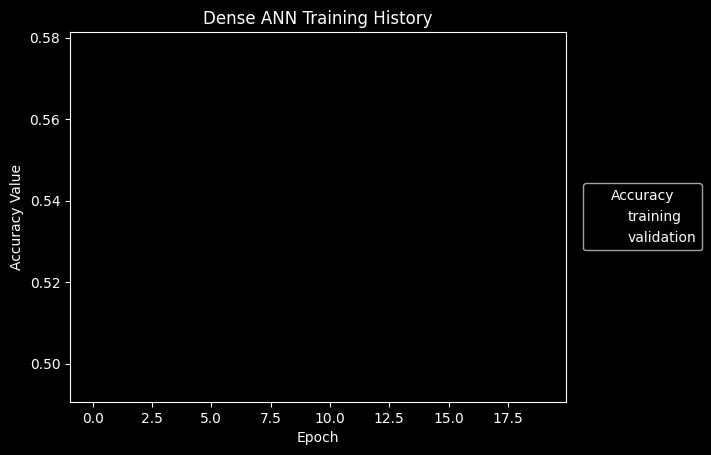

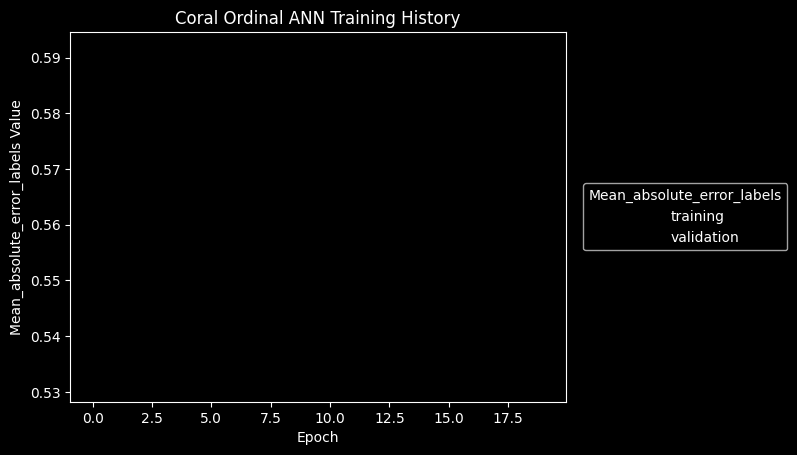

In [17]:
cmap = matplotlib.colormaps["Dark2"]


def plot_history_from_df_row(row):
    """Plot the history with the parameters from a row in a DataFrame"""
    plt.figure()
    plot_training_history(
        model=row["model"],
        history=row["history"],
        metric=row["metric"],
        training_options={"linestyle": "--", "color": cmap(row["i_color"])},
        validation_options={"color": cmap(row["i_color"])},
    )


models_df.apply(plot_history_from_df_row, axis=1)

# Conclusion
The applied ann do not provide better predictions than the conventional models from notebook 2.
It is noticeable that the training hardly provides any improvement over the different epochs,
as seen in the validation loss.